In [1]:
import sys, os, time, datetime, h5py, json, glob
import numpy as np
from scipy.stats import norm, expon, chi2, uniform, chisquare, poisson, beta
from scipy.special import logsumexp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.font_manager as font_manager
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')

from tests_gaia import *

# 1D

In [10]:
flk_sigmas_all = [
    0.01,
    0.1, 
    0.3,
    0.7, 
    1.4,
    2.3,
    3.0,
    4.5,
    9.0,
]
files = [
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS0_M1000_lam1e-06/NR200000_NB2000_NS0_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS7_loc4_std0.01_M1000_lam1e-06/NR200000_NB2000_NS7_loc4_std0.01_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS18_loc4_std0.16_M1000_lam1e-06/NR200000_NB2000_NS18_loc4_std0.16_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS13_loc4_std0.64_M1000_lam1e-06/NR200000_NB2000_NS13_loc4_std0.64_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS90_loc1.6_std0.16_M1000_lam1e-06/NR200000_NB2000_NS90_loc1.6_std0.16_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS10_loc6.4_std0.16_M1000_lam1e-06/NR200000_NB2000_NS10_loc6.4_std0.16_M1000_lam1e-06.h5',
]


np_list = ['ref',
           'narrow_NB2000_NS7_loc4_std0.01',
           'narrow_NB2000_NS18_loc4_std0.16', 'broad_NB2000_NS13_loc4_std0.64', 
           'narrow_NB2000_NS90_loc1.6_std0.16', 'narrow_NB2000_NS10_loc6.4_std0.16']

tstat_dict = {}
i=0
for f5 in files:
    #print(NP, np_list[i])
    tmp = []
    f = h5py.File(f5, 'r')
    if not len(flk_sigmas_all):
        flk_sigmas_all = list(f.keys())
    for flk_sigma in flk_sigmas_all:
        key = str(flk_sigma) 
        tmp.append(np.array(f[key]))#[:100,]
    f.close()
    print('Number of toys: ', tmp[0].shape)
    tstat_dict[np_list[i]] = np.stack(tmp, axis=1)
    i+=1

Number of toys:  (4000,)
Number of toys:  (4000,)
Number of toys:  (2000,)
Number of toys:  (2000,)
Number of toys:  (2000,)
Number of toys:  (2000,)


In [11]:
tests=[0,2,3,4,7,8]
for NP in np_list:
    print(NP)
    ref = tstat_dict['ref'][:,tests]
    data = tstat_dict[NP][:,tests]
    ref_90 = tstat_dict['ref'][:,[5]]
    data_90 = tstat_dict[NP][:,[5]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
1 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
2 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
3 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
4 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
5 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-min	 [(0.02325, 0.00237, 0.00236), (0.0015, 0.00059, 0.00059)]
p-prod	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-avg	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
t-smax	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-90	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
+++++++++++++++++++
narrow_NB2000_NS7_loc4_std0.01
0 [(0.039, 0.00305, 0.00303), (0.00275, 0.00081, 0.00081)]
1 [(0.083, 0.00436, 0.00431), (0.012, 0.00171, 0.0017)]
2 [(0.0715, 0.00407, 0.00403), (0.006, 0.00121, 0.0012)]
3 [(0.0515, 0.00349, 0.00346), (0.004, 0.00098, 0.00098)]
4 [(0.03725, 0.00298, 0.00296

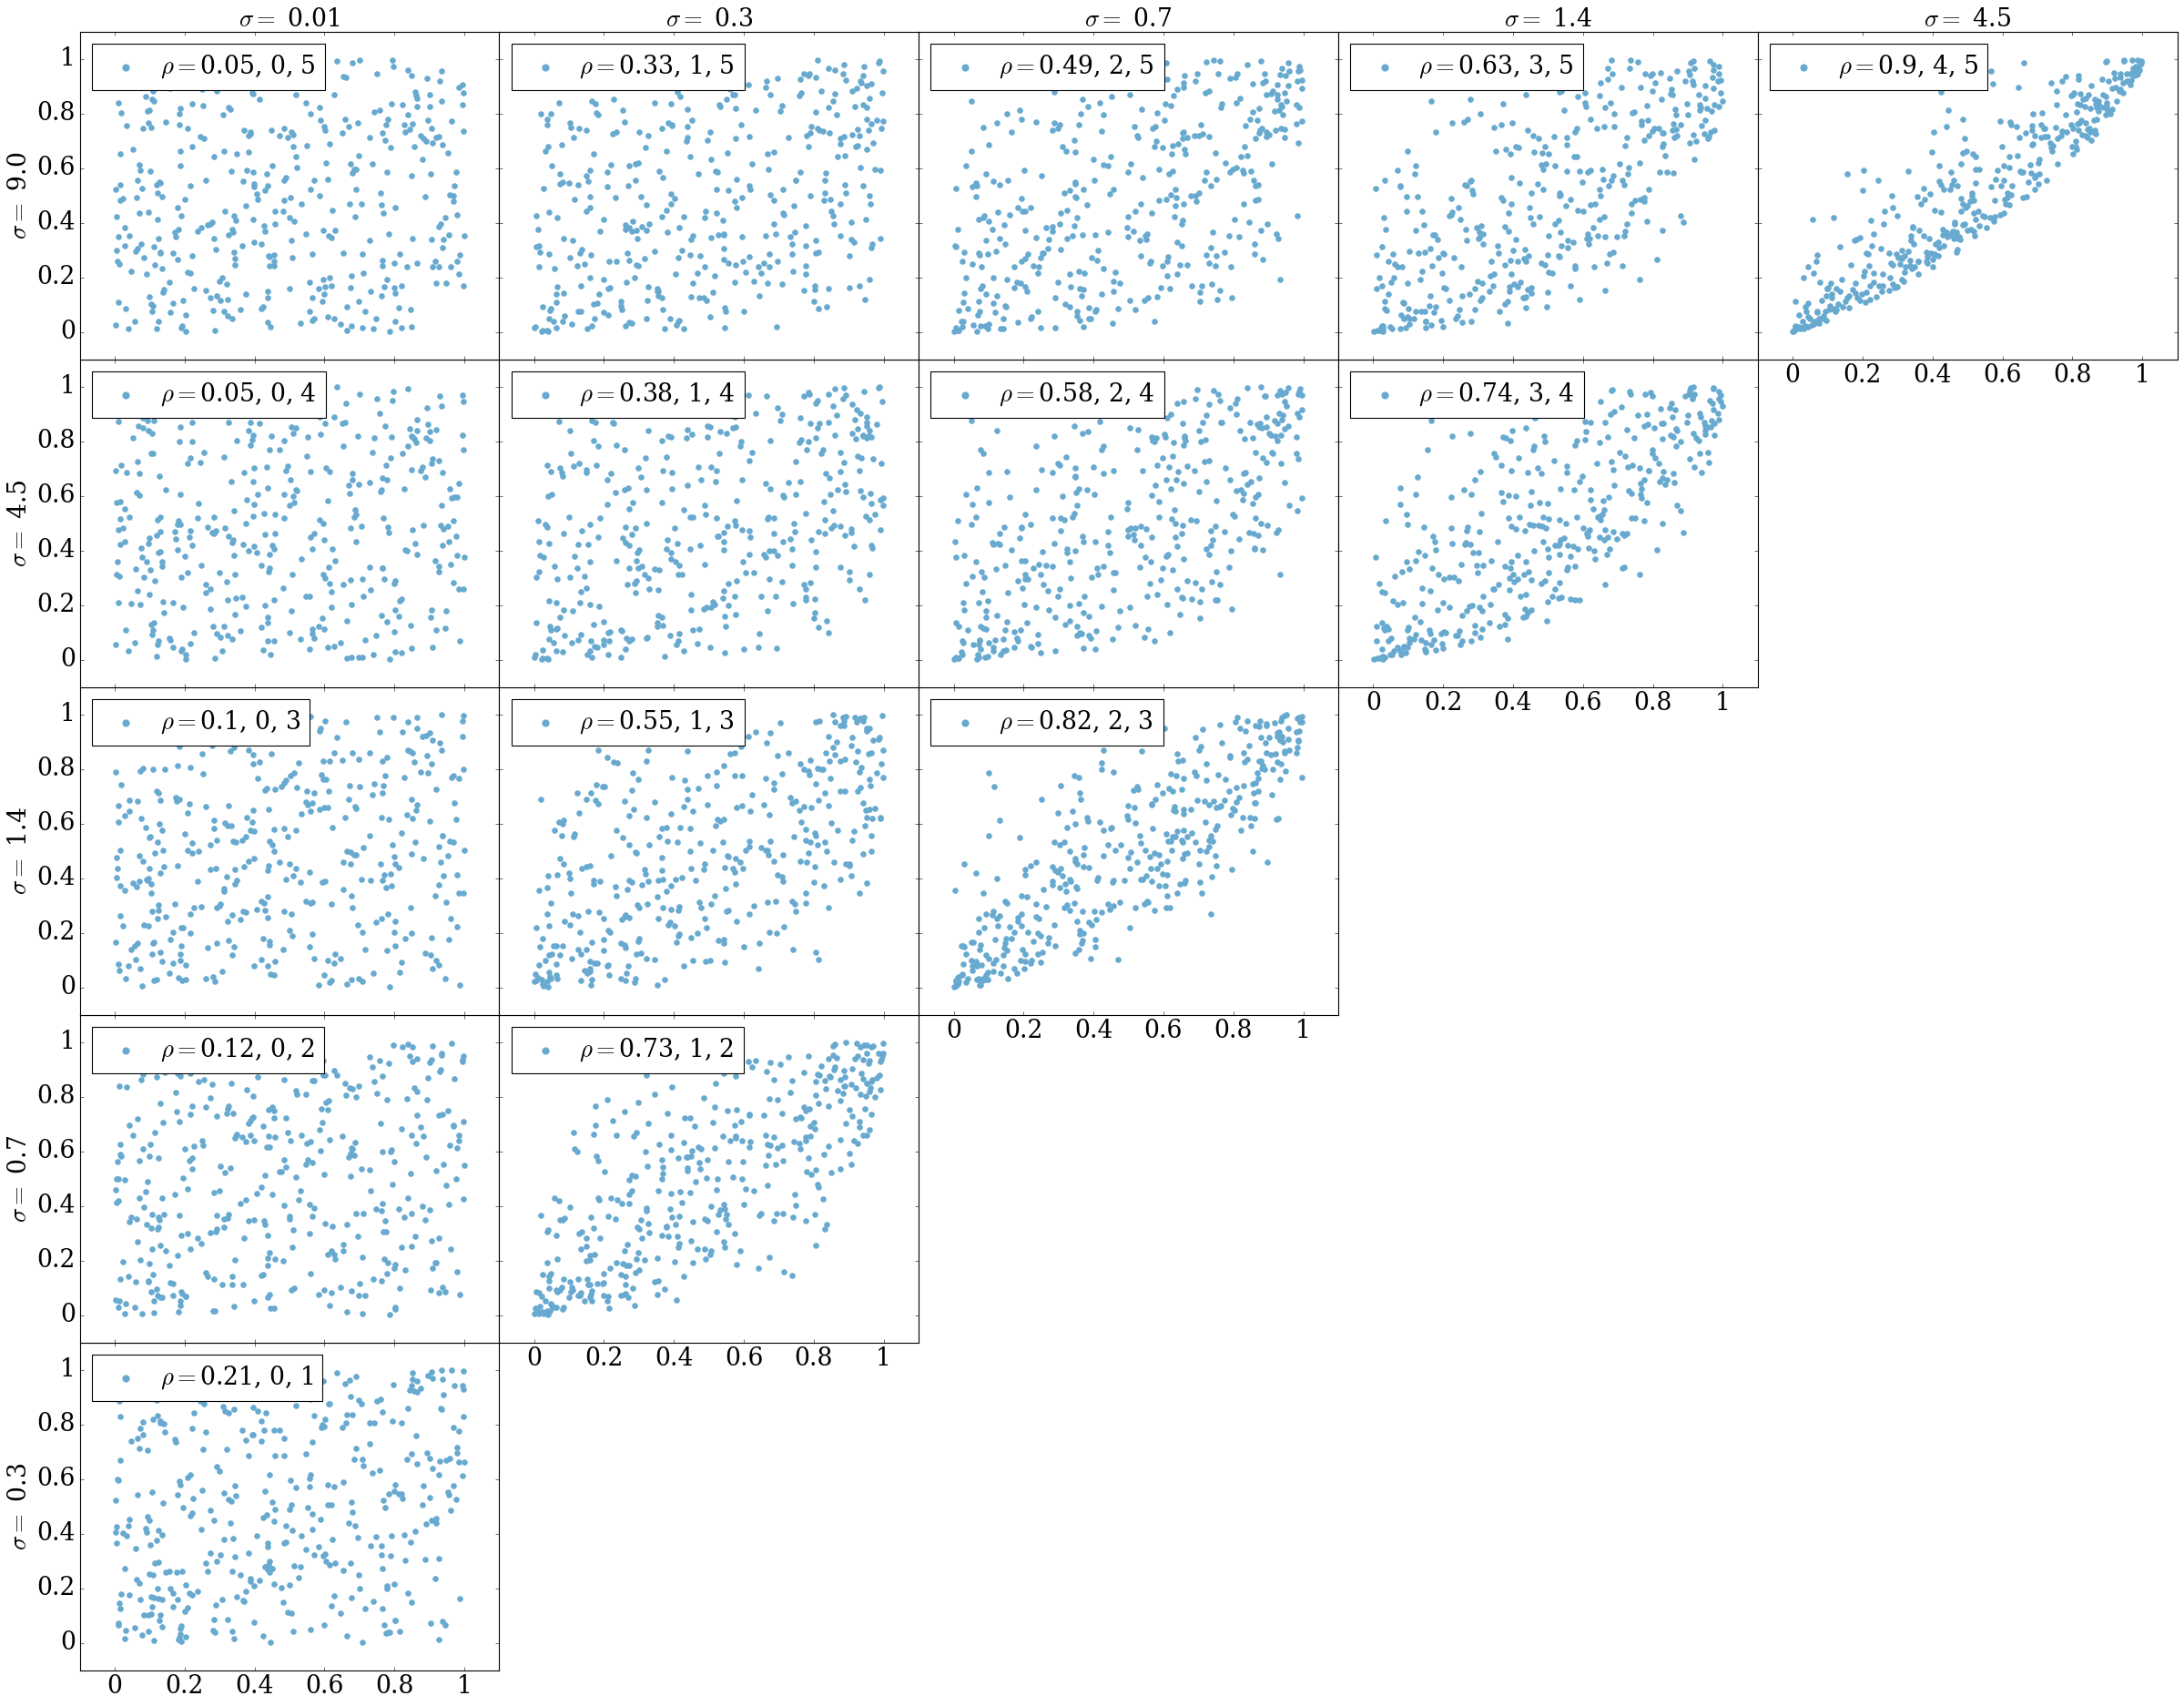

avg pair-wise correlation:  0.4445358857339714


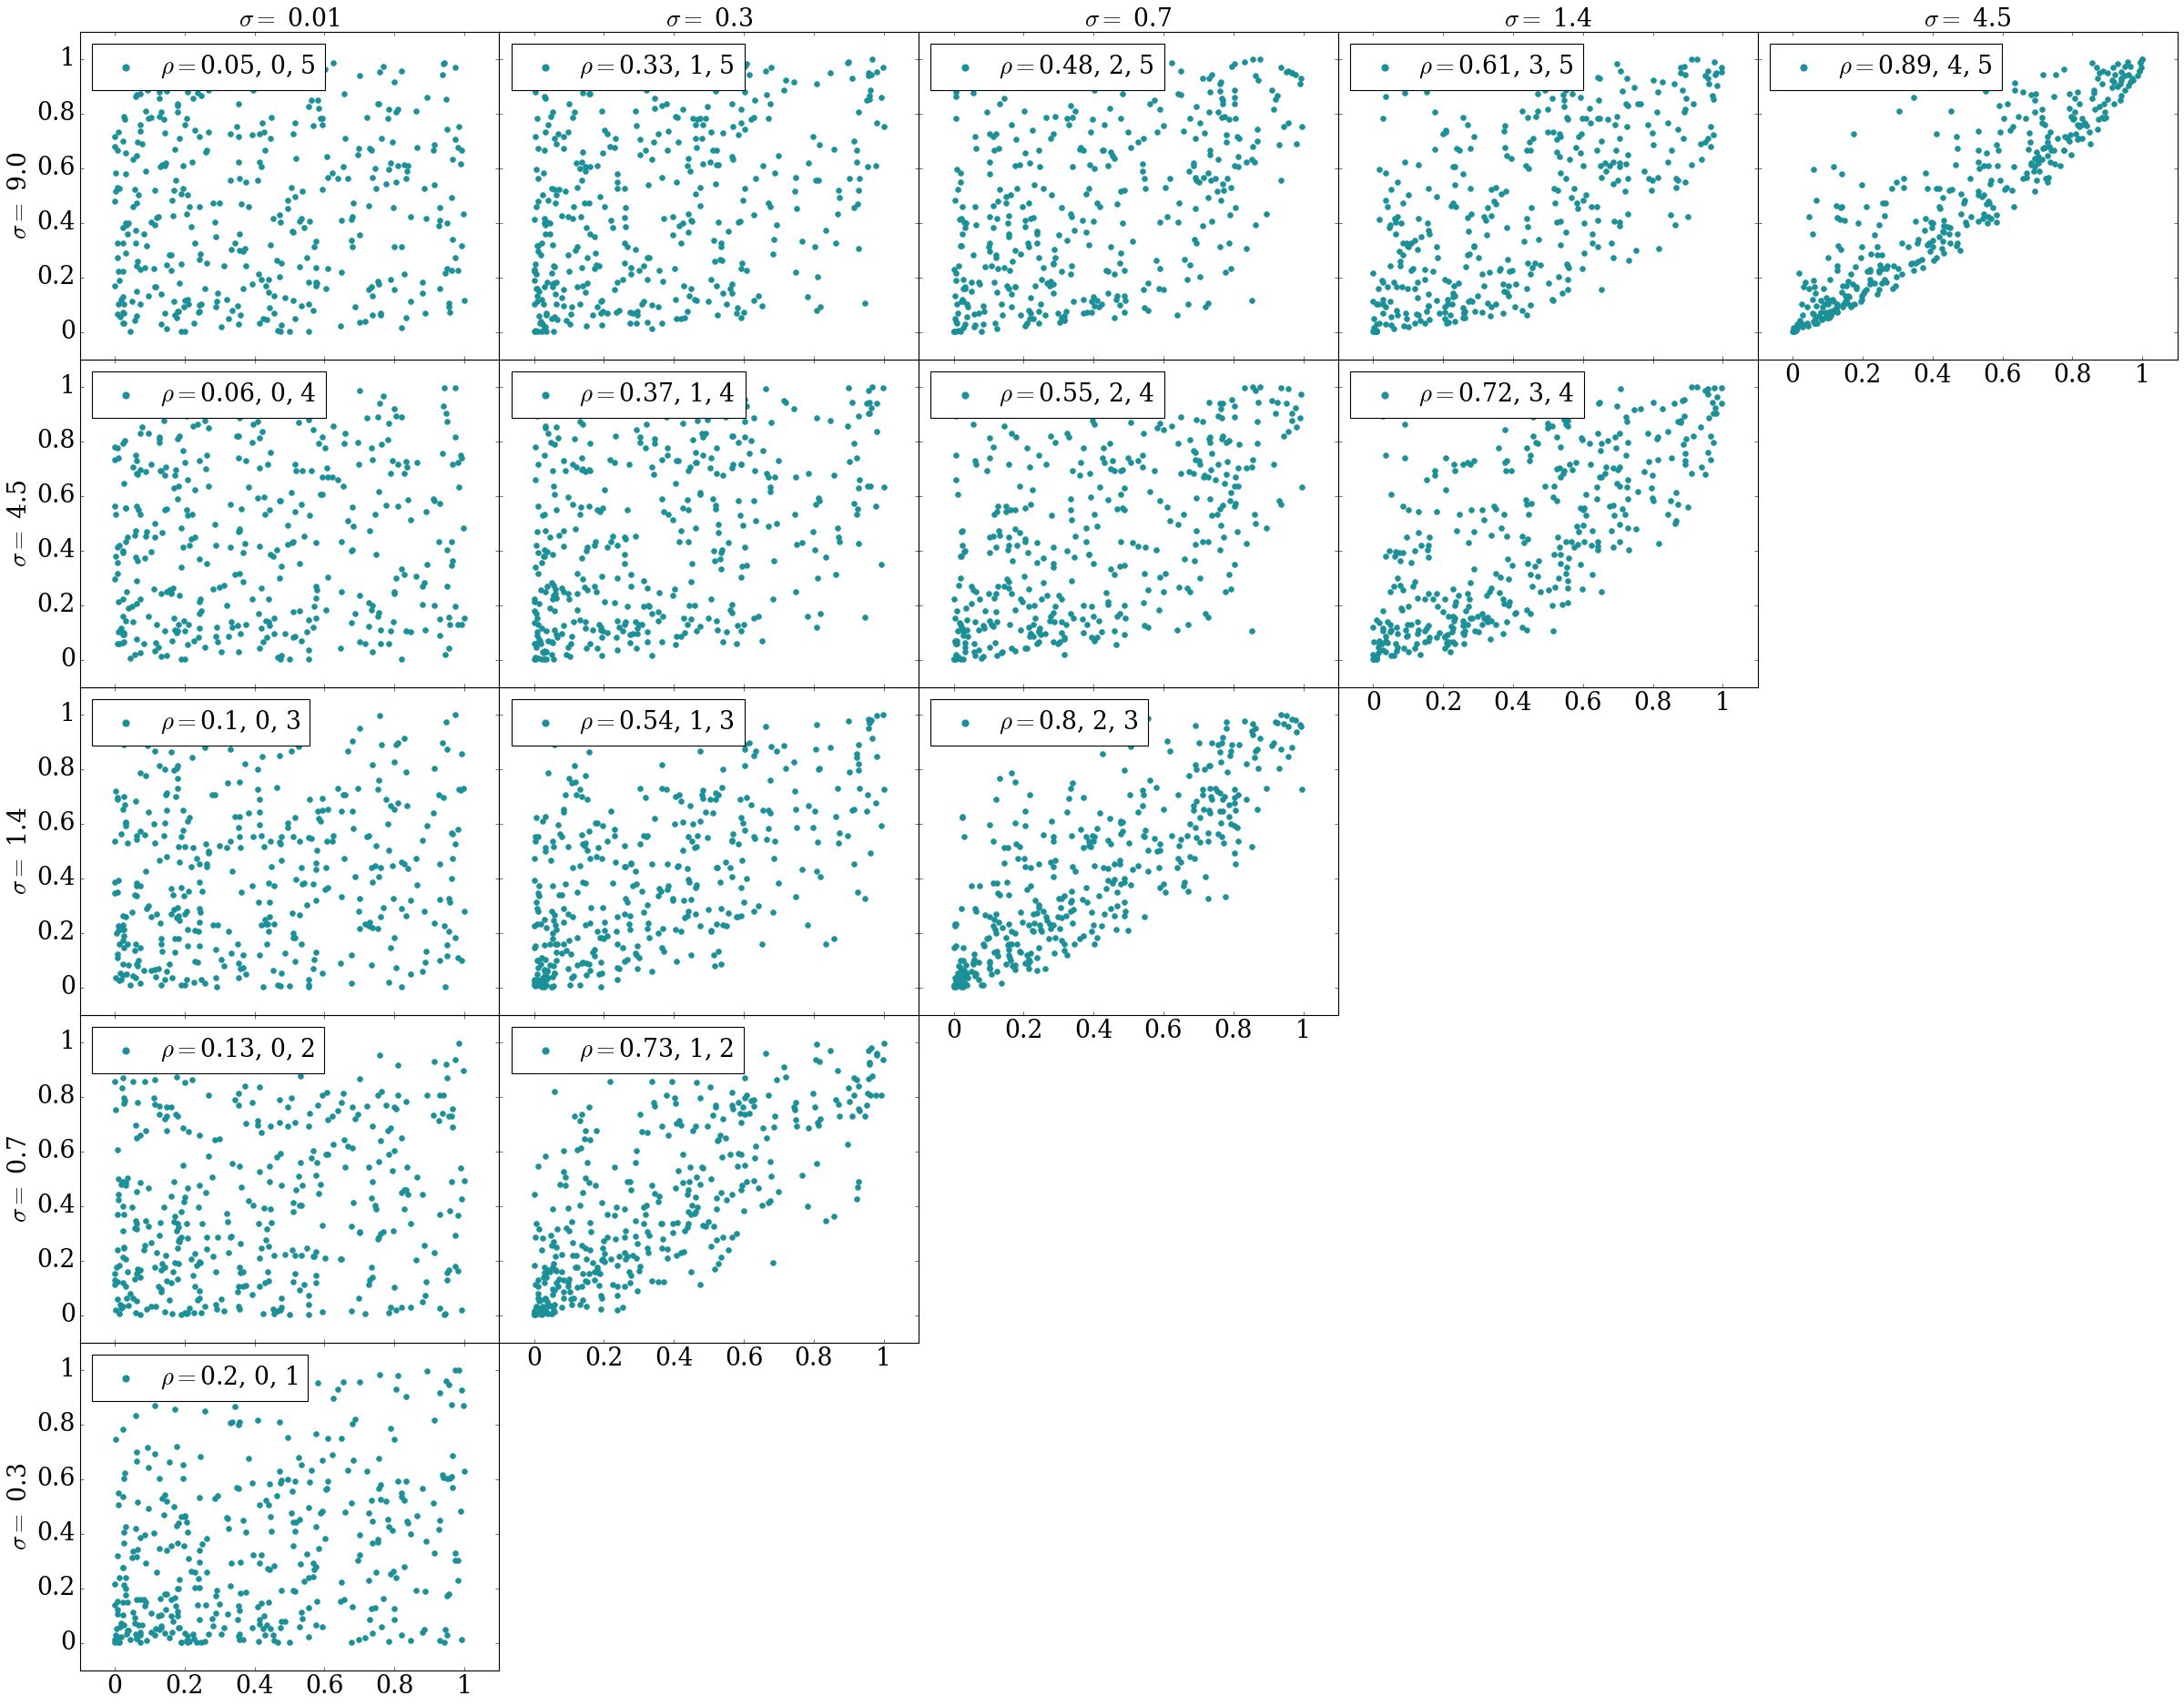

avg pair-wise correlation:  0.4404970042447951


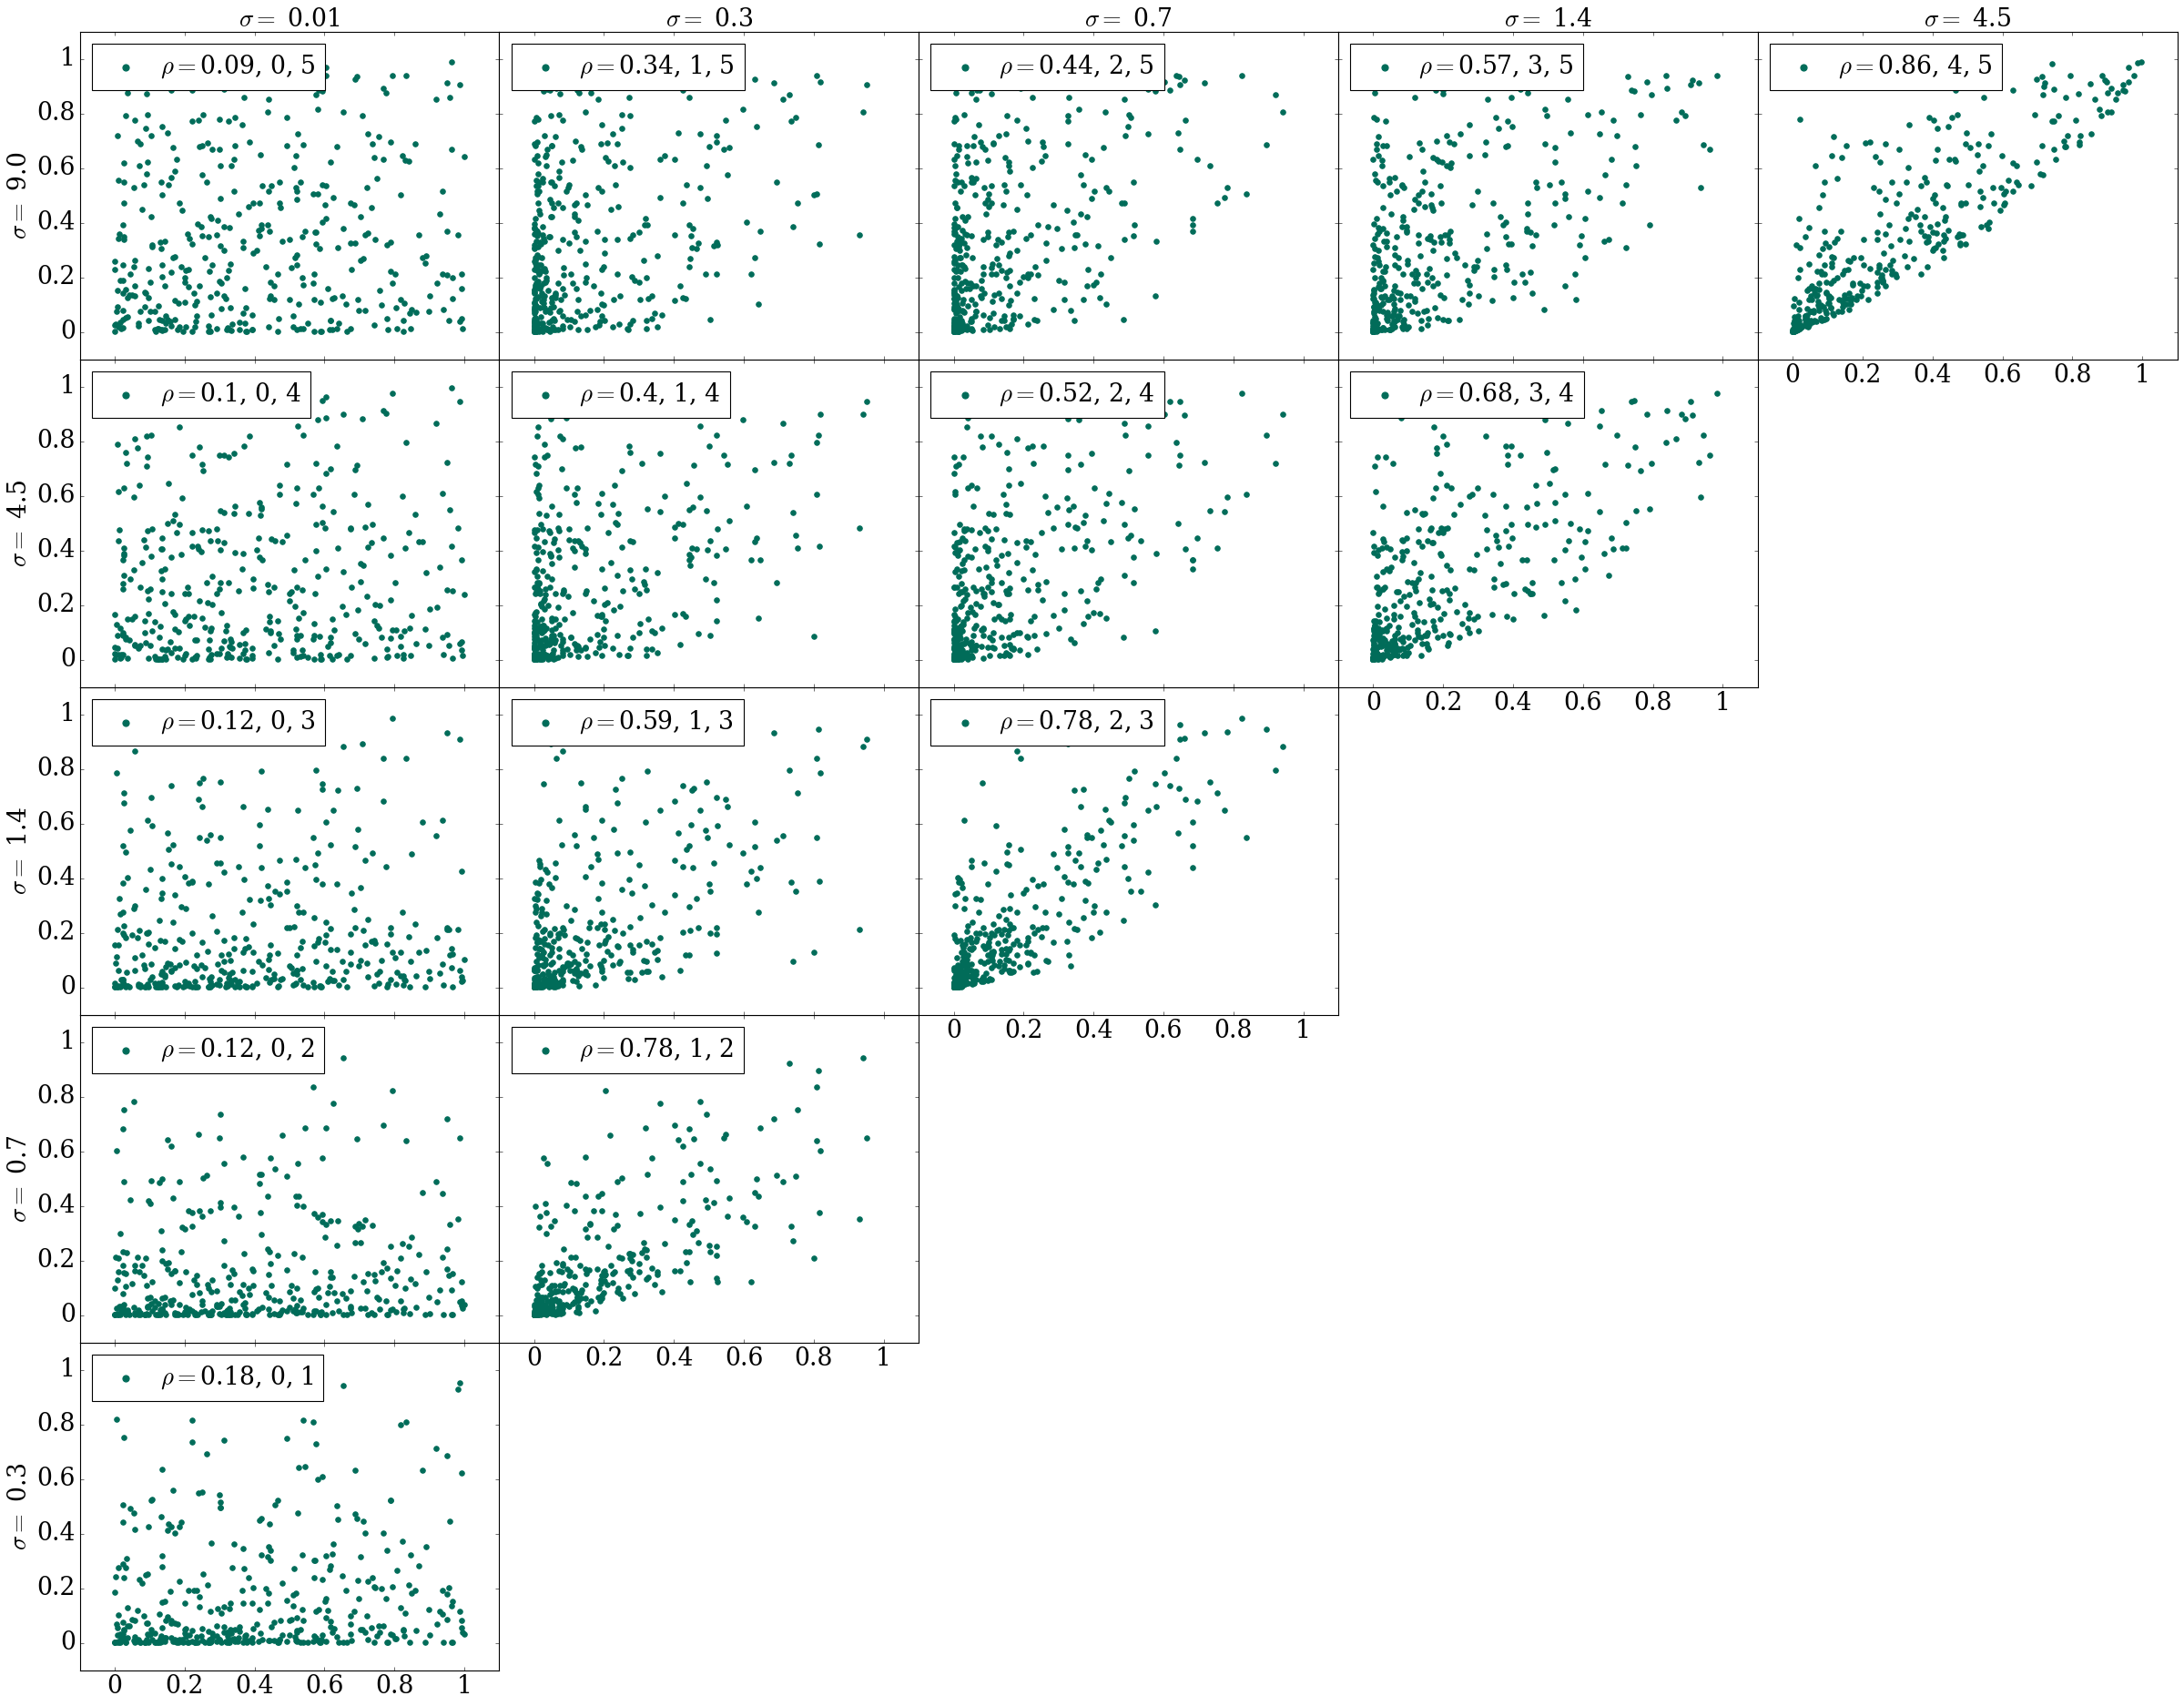

avg pair-wise correlation:  0.43976371241637136


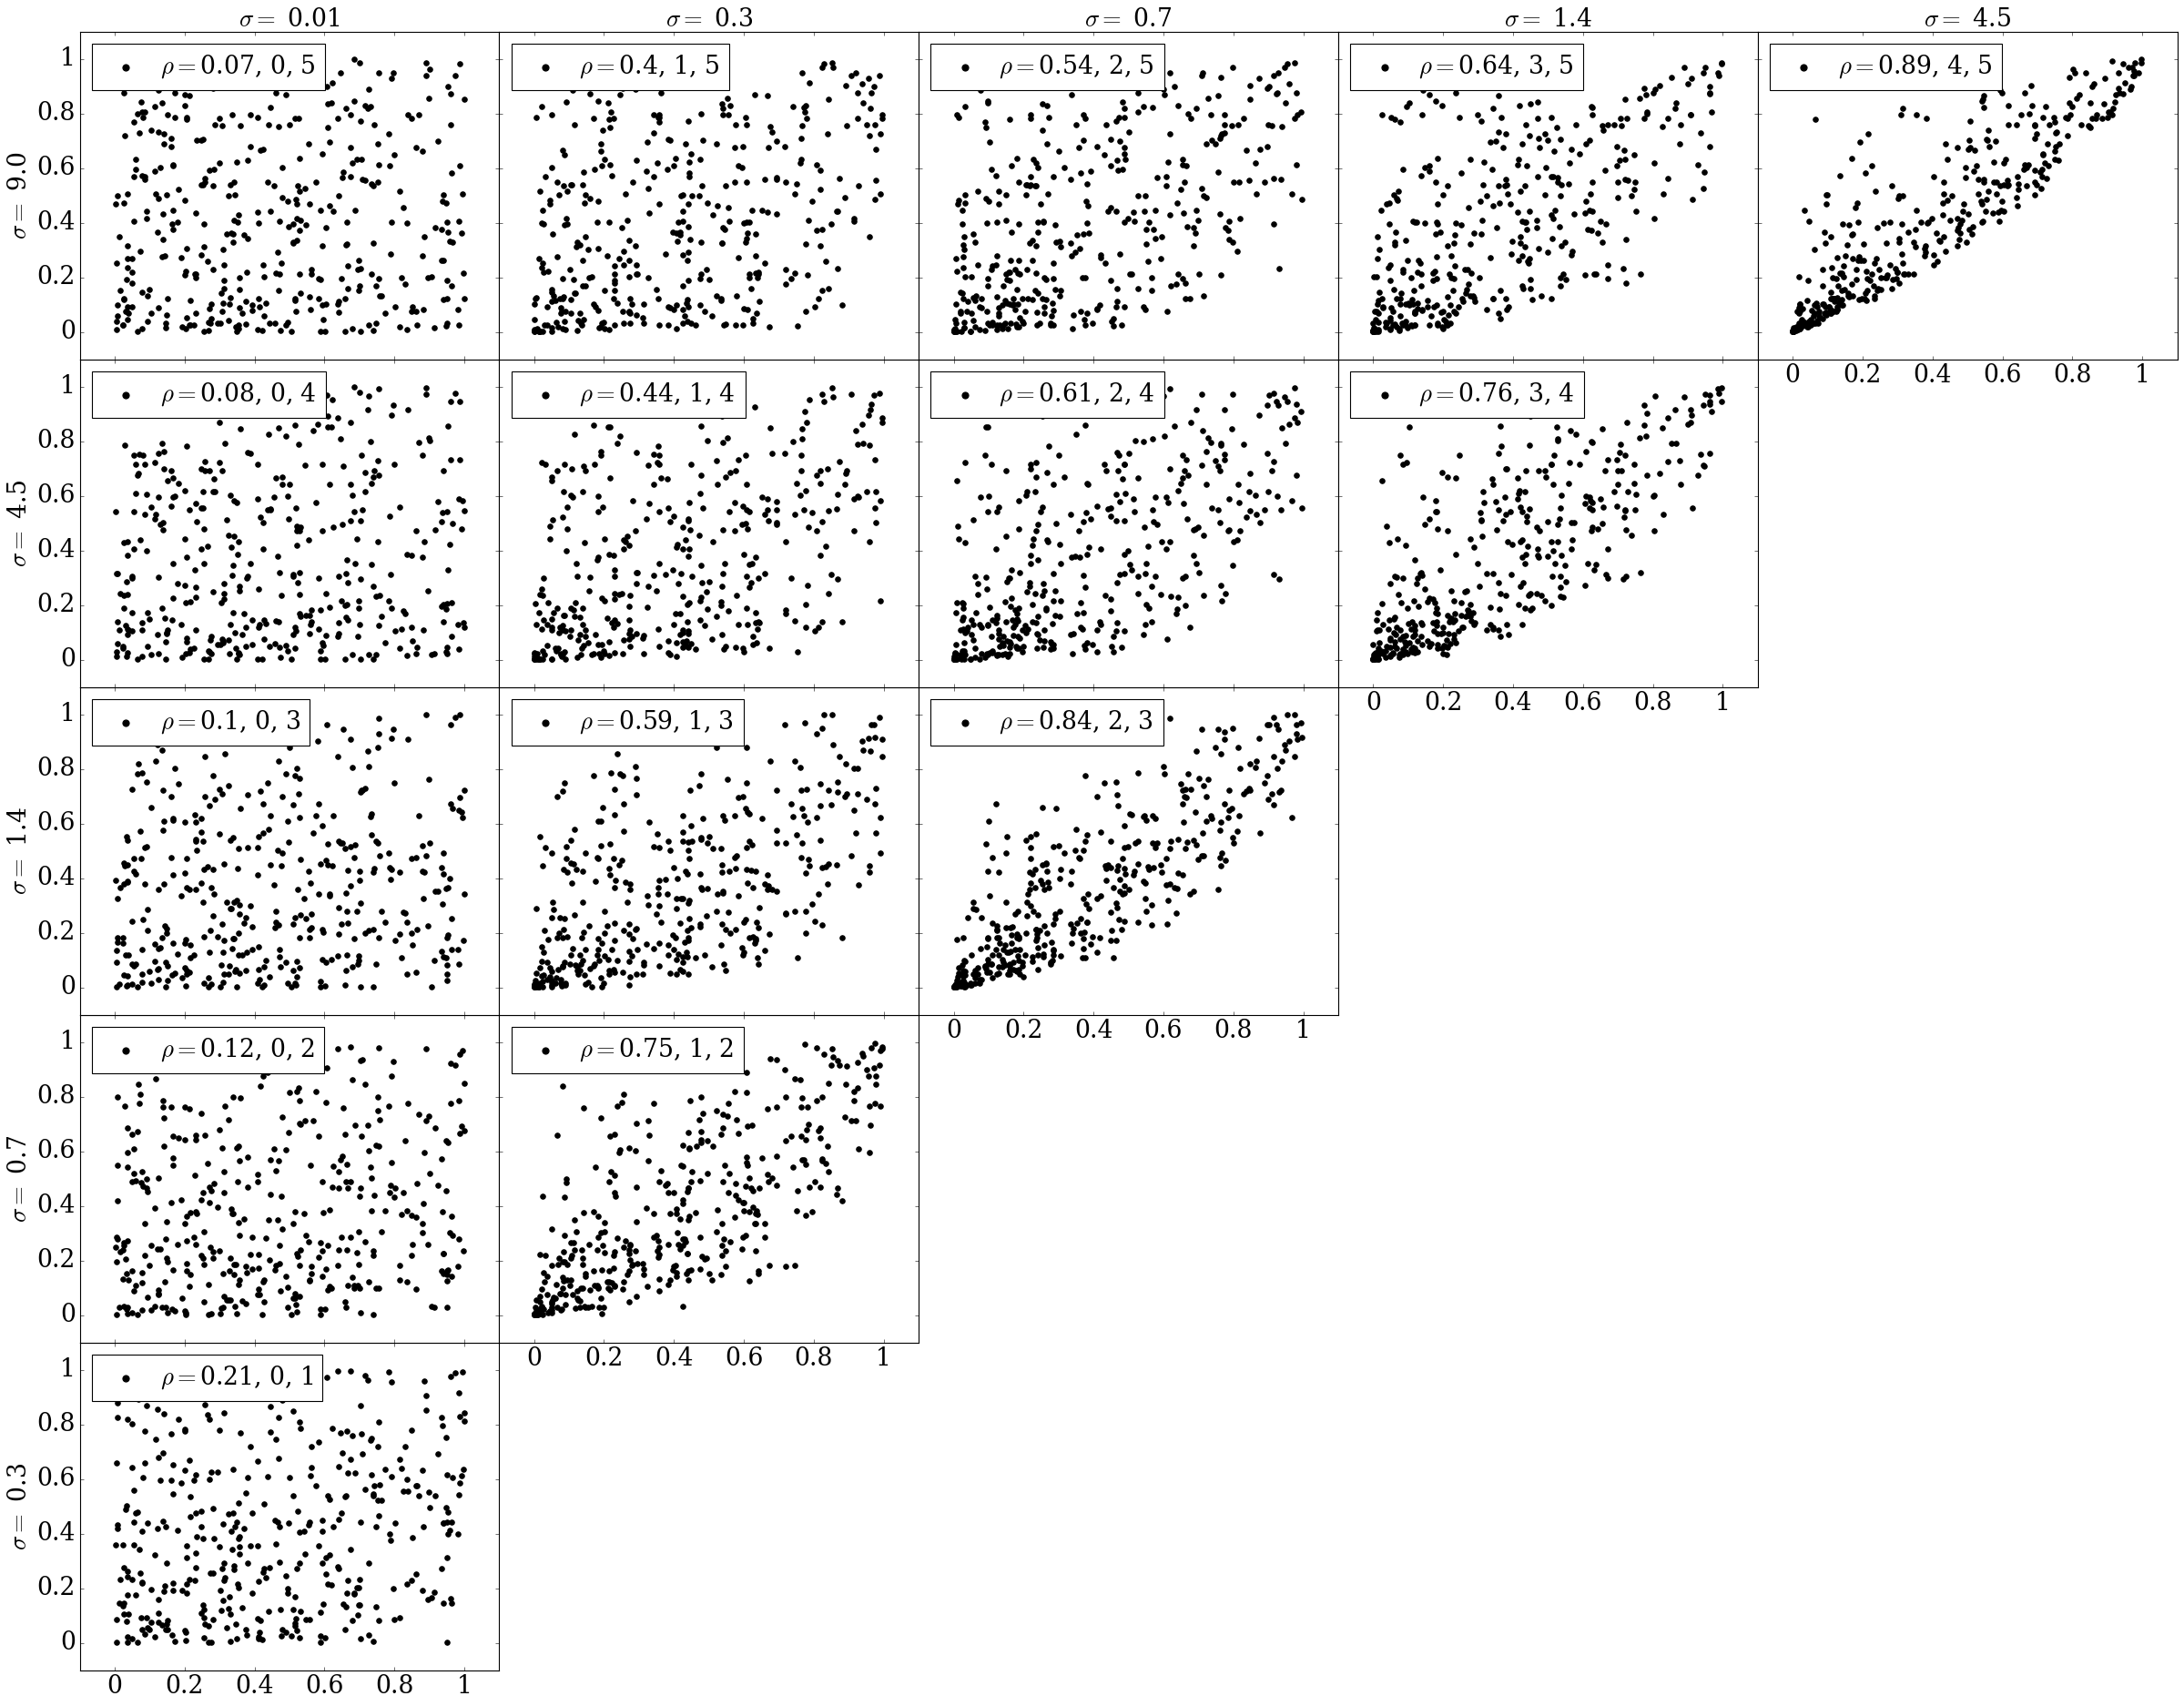

avg pair-wise correlation:  0.4475481010749603


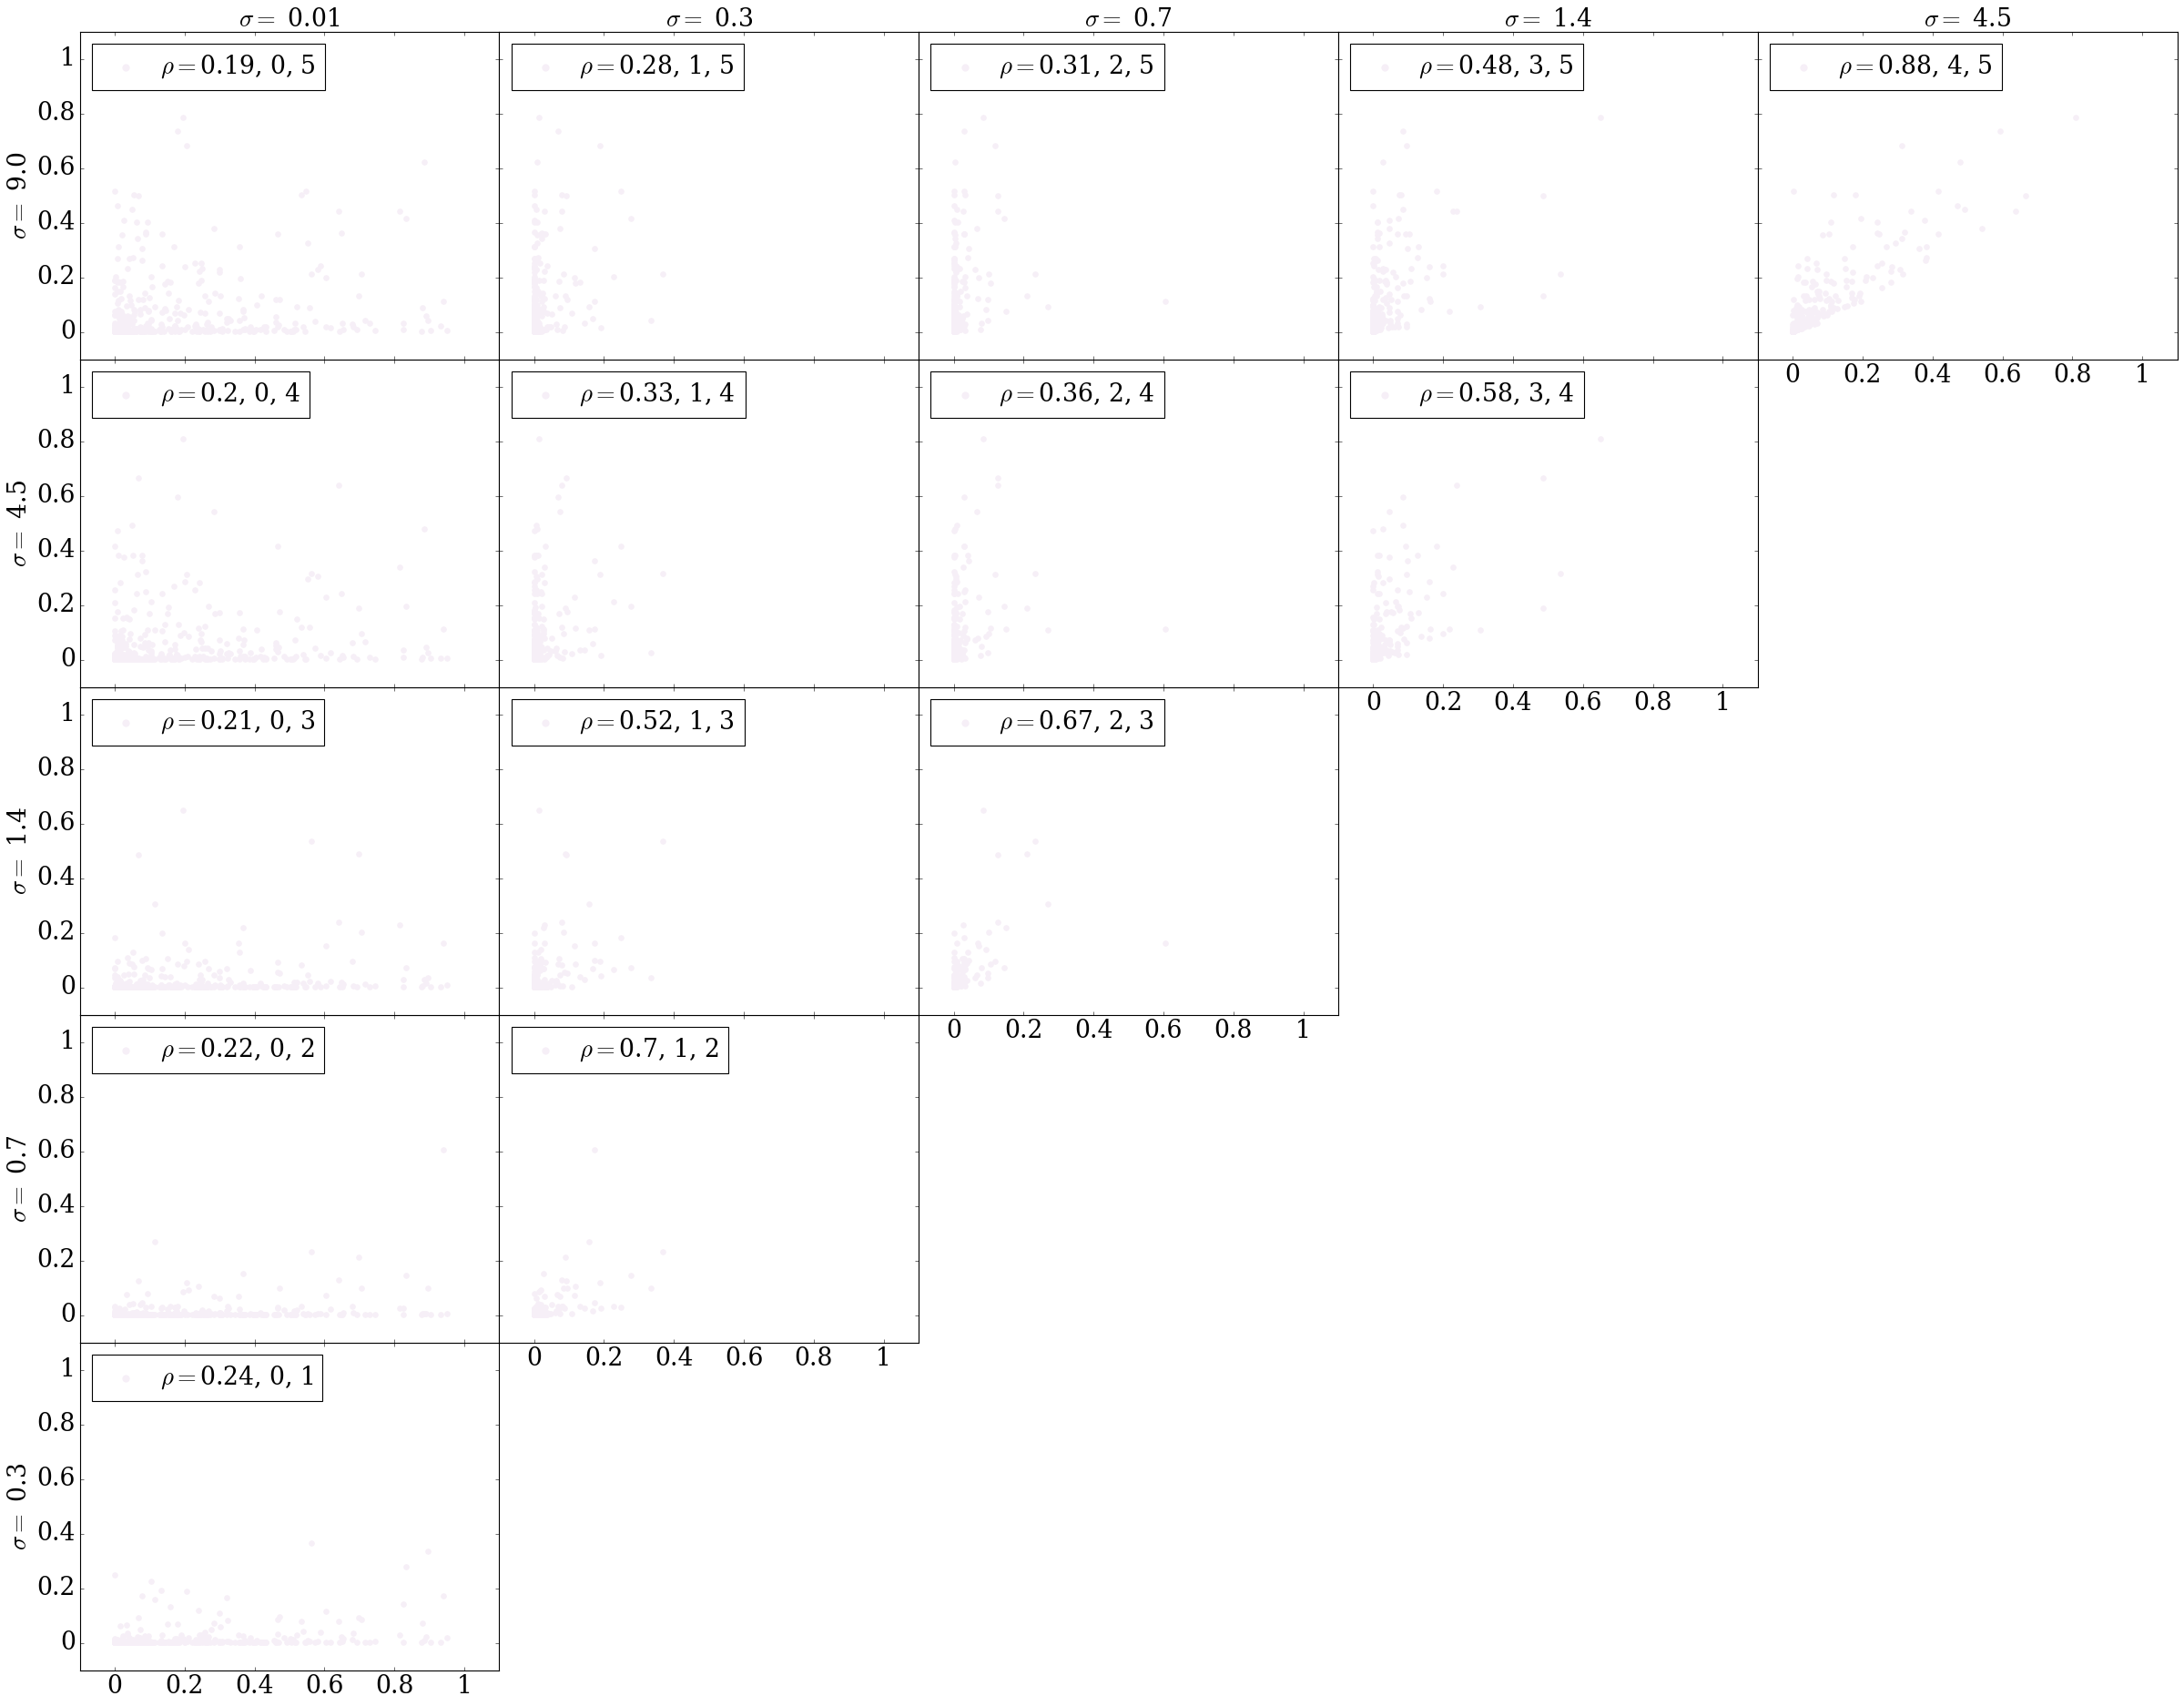

avg pair-wise correlation:  0.44057086907583254


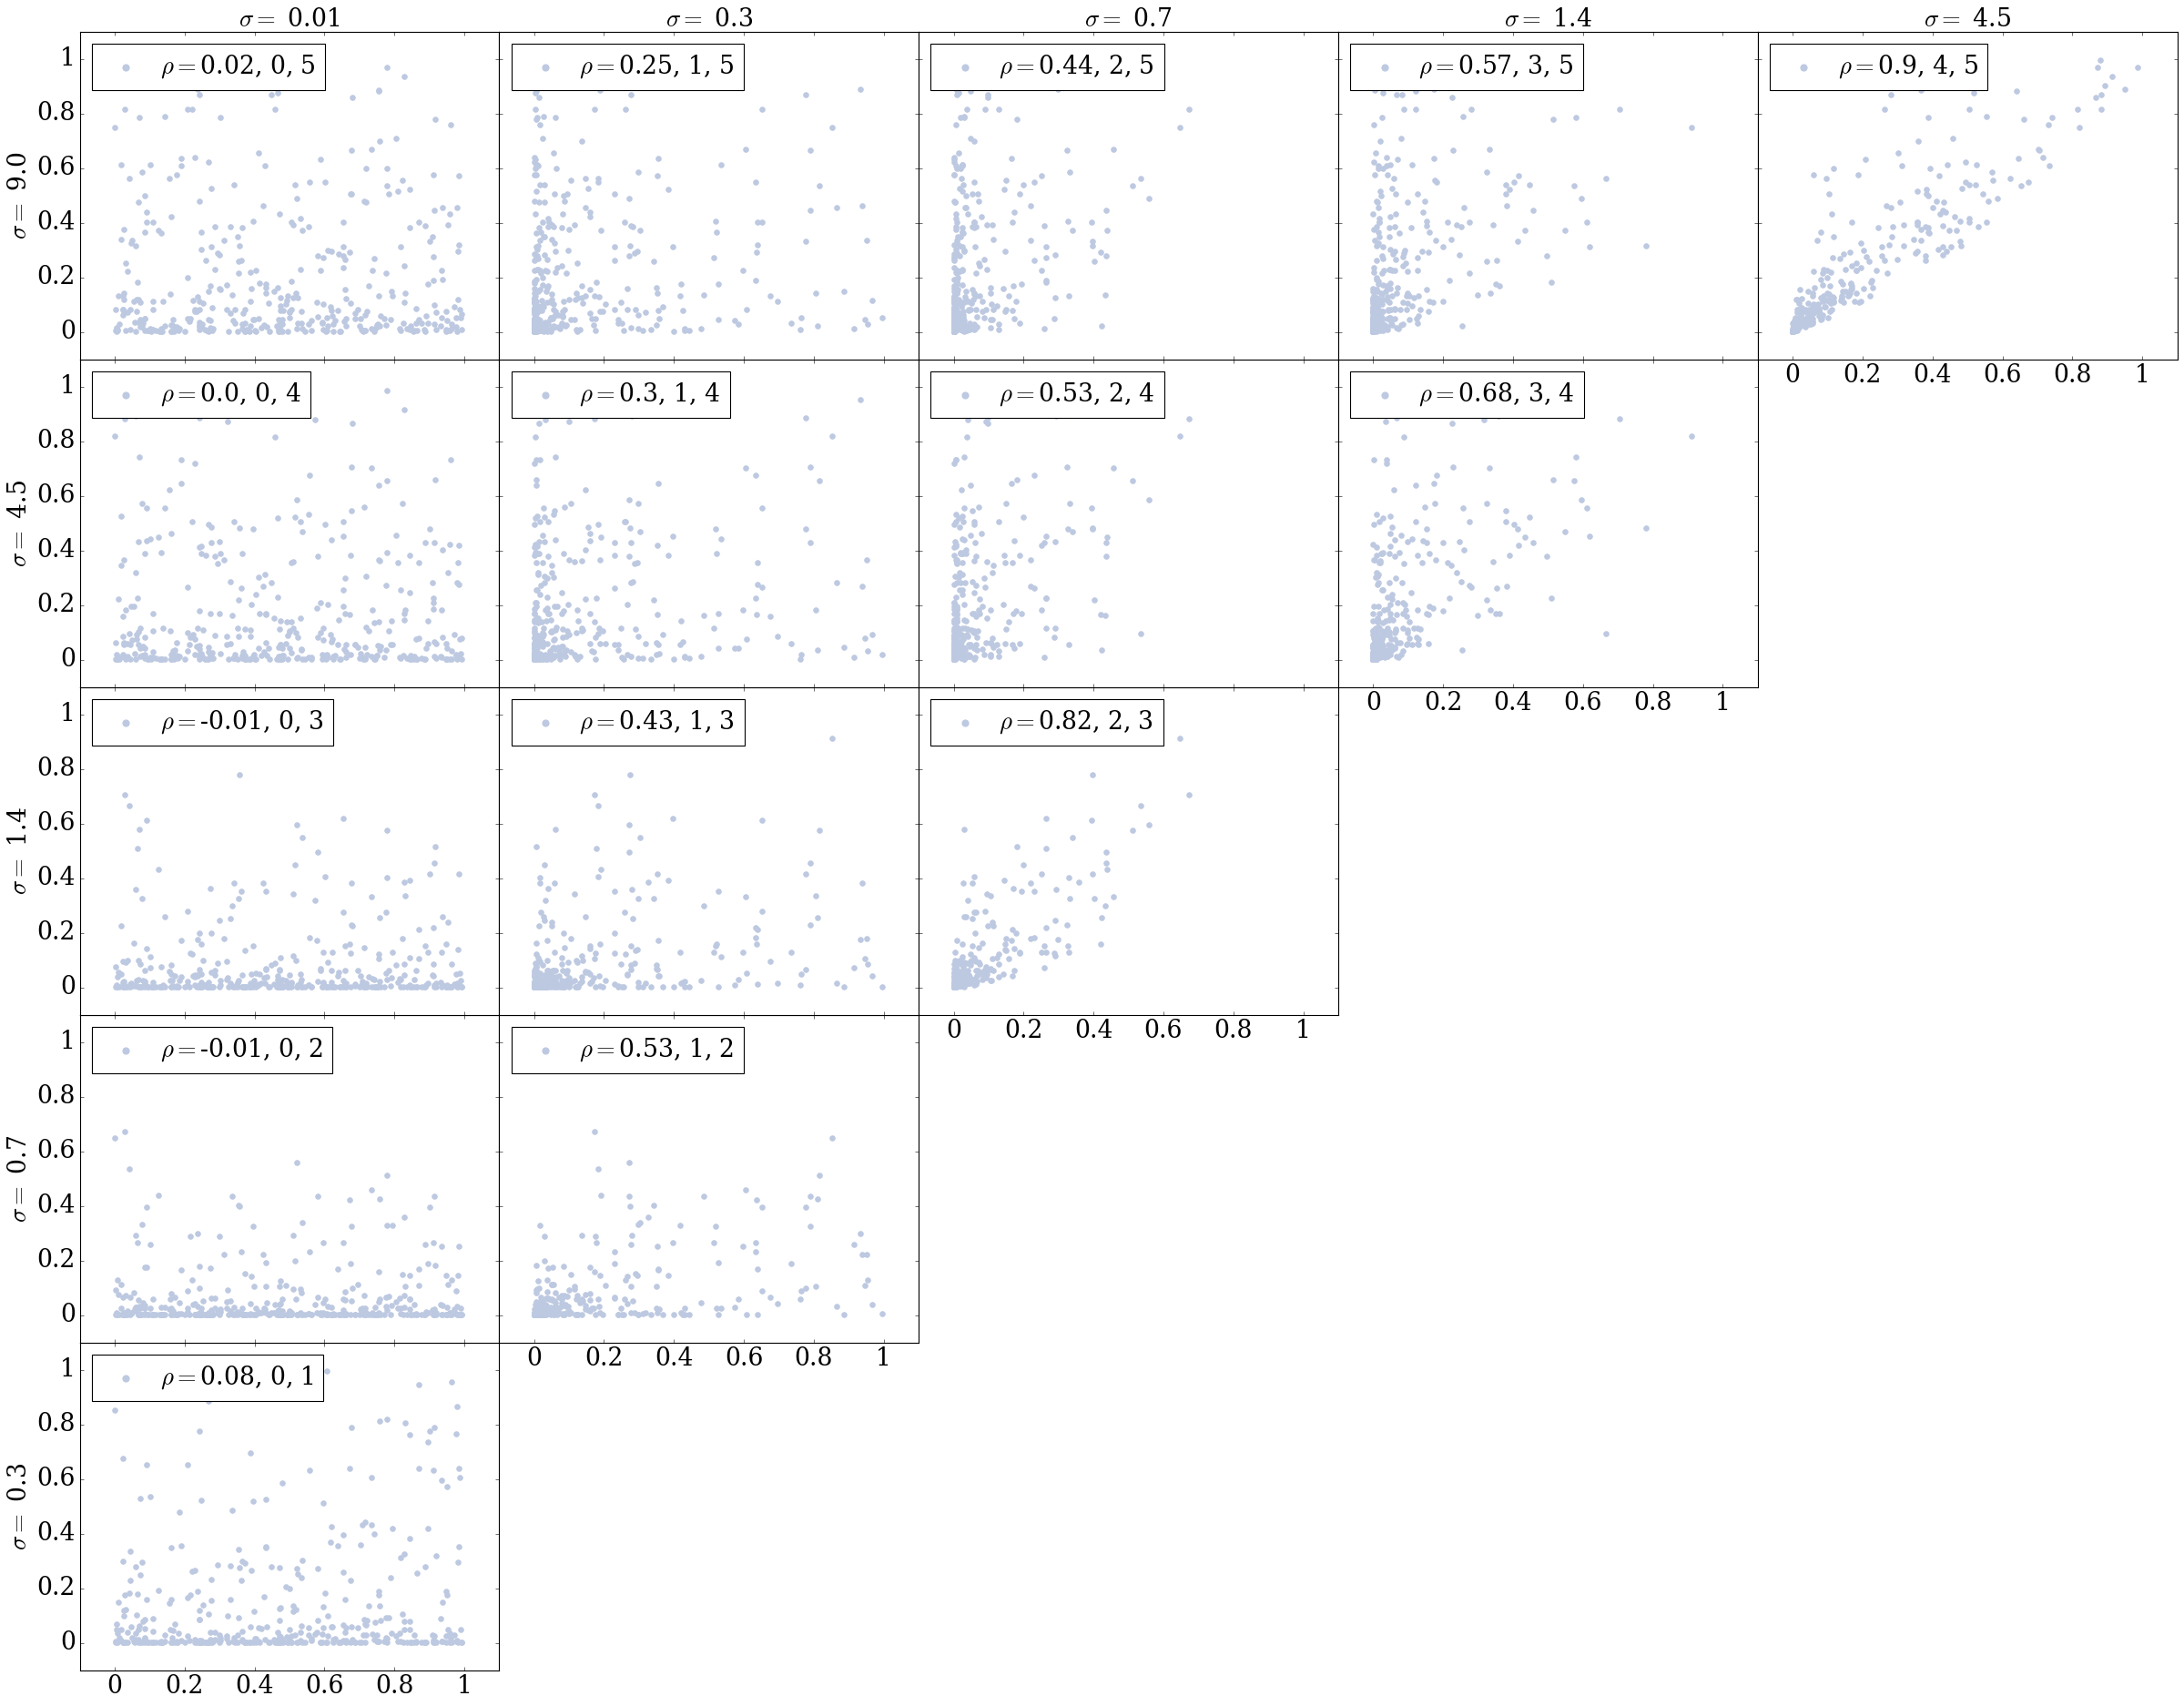

avg pair-wise correlation:  0.4287582024926715


In [120]:
tests = [0, 2, 3, 4, 7, 8]
flk_sigmas = [flk_sigmas_all[i] for i in tests]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
labels = [NP.replace('_', ' ').replace('NS', 'N(S)=').replace('std', r'$\sigma=$ ').replace('loc', r'$\bar x =$ ') for NP in np_list]
color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
corr_list=[]

for k in range(len(np_list)):
    fig  = plt.figure(figsize=(32, 25))
    fig.patch.set_facecolor('white')
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.18, 0.07+(j-1)*0.18, 0.18, 0.18])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(tstat_dict['ref'][:,tests[i]].reshape((-1,1)),tstat_dict[np_list[k]][:,tests[i]].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(tstat_dict['ref'][:,tests[j]].reshape((-1,1)),tstat_dict[np_list[k]][:,tests[j]].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:, 0], p_data_j[:, 0])[0][1]
                corr_list.append(corr)
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker=markers[k], 
                            label=r'$\rho=$%s, %i, %i'%(str(np.around(corr, 2)), i, j)#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_1D_%i.pdf'%(k))
    plt.show()
    print('avg pair-wise correlation: ', np.sum(corr_list)/len(corr_list))

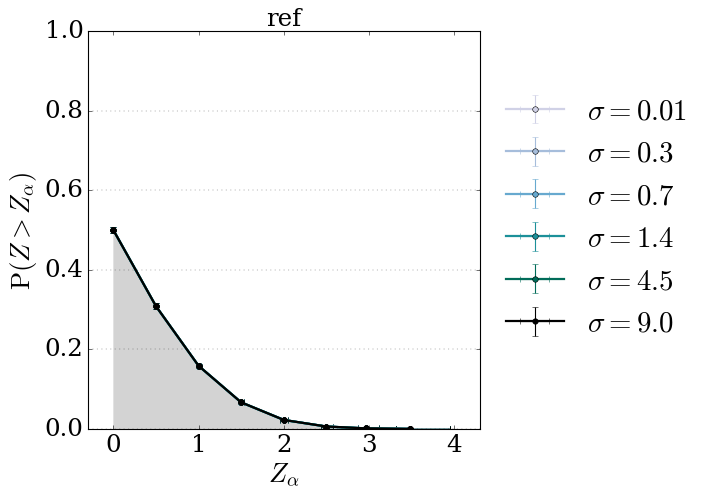

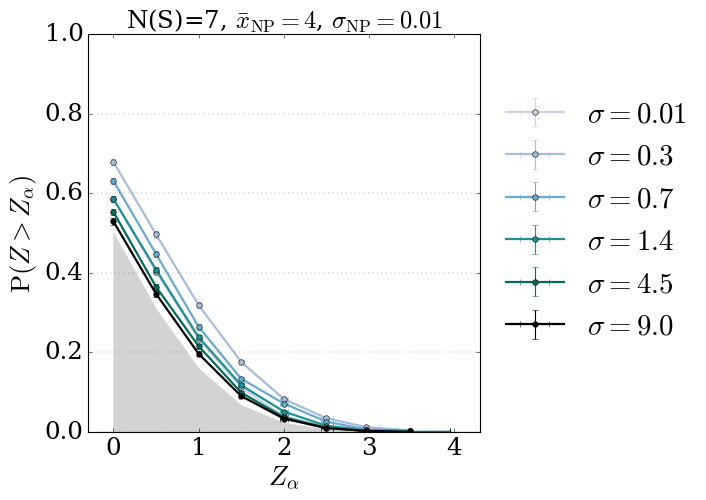

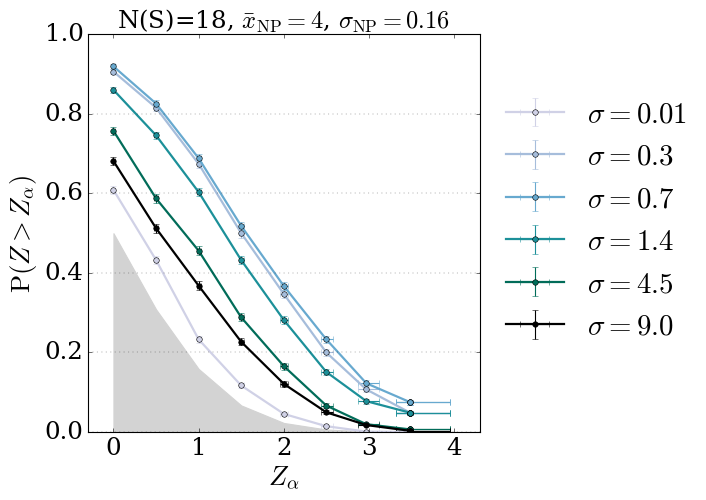

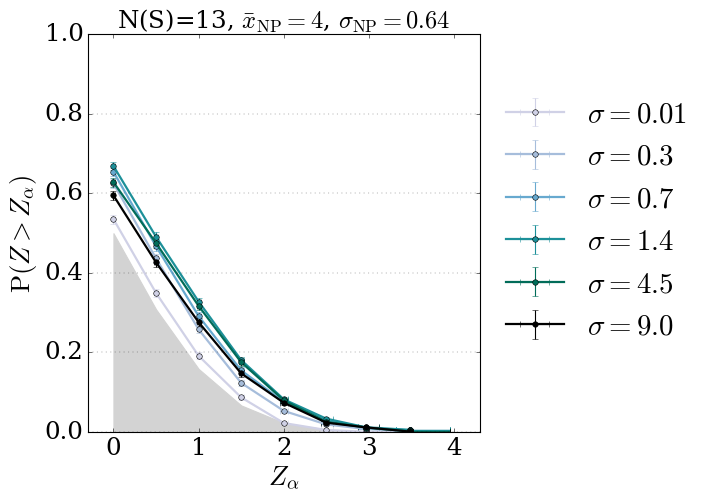

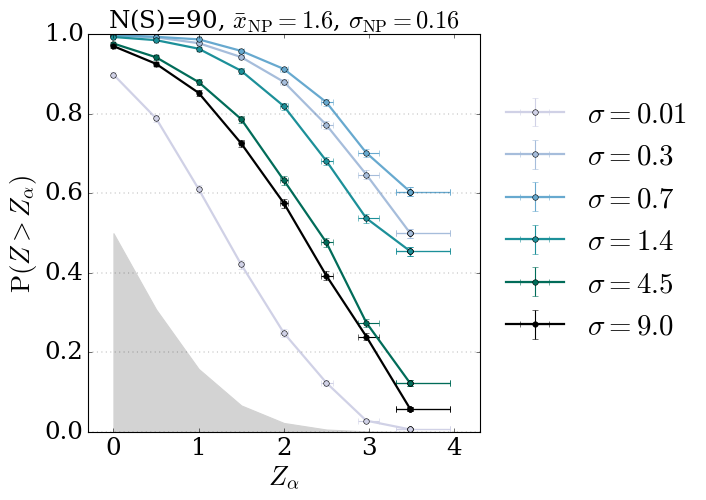

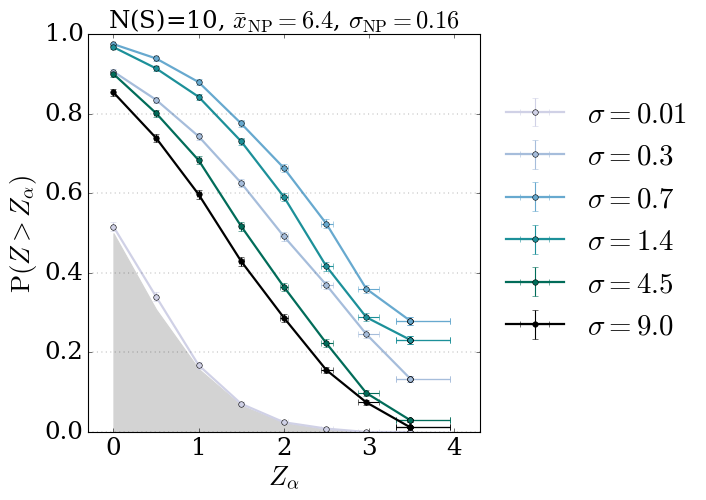

In [12]:
colors = ['#d0d1e6','#a6bddb','#67a9cf','#1c9099','#016c59', 'black']    
font = font_manager.FontProperties(family='serif', size=26) 

tests = [0, 2, 3, 4, 7, 8]
flk_sigmas = [flk_sigmas_all[i] for i in tests]

labels_plot = {
    'ref':'ref',
    'narrow_NB2000_NS7_loc4_std0.01': r'N(S)=7, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.01$',
    'narrow_NB2000_NS18_loc4_std0.16': r'N(S)=18, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.16$',
    'broad_NB2000_NS13_loc4_std0.64': r'N(S)=13, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.64$',
    'narrow_NB2000_NS90_loc1.6_std0.16': r'N(S)=90, $\bar x_{\rm NP}=1.6$, $\sigma_{\rm NP}=0.16$', 
    'narrow_NB2000_NS10_loc6.4_std0.16': r'N(S)=10, $\bar x_{\rm NP}=6.4$, $\sigma_{\rm NP}=0.16$'
}
xlabels_tests= [ r'$\sigma=%s$'%(str(flk_sigma)) for flk_sigma in flk_sigmas]

Z_alpha_ini = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 5]#[0,0.2, 0.5, 1, 1.2, 1.5, 1.7, 2, 2.5, 3.5, 4.5]
Z_alpha_ini = np.array(Z_alpha_ini)

lw=2
ms=5
ls='-'
zorder=2
plot_legend=True
for NP in np_list:
    fig  = plt.figure(figsize=(7*(1+0.4*(plot_legend==1)),7))
    fig.patch.set_facecolor('white')
    ax1 = fig.add_axes([0.2*1/(1+0.4*(plot_legend==1)), 0.15+0.01*(plot_legend==1), 0.7/(1+0.4*(plot_legend==1)), 0.7+0.01*(plot_legend==1)])
    
    ref = tstat_dict['ref'][:,tests]
    data = tstat_dict[NP][:,tests]
    
    for i in range(ref.shape[1]):
        t0  = ref[:, i]
        t = data[:, i]
        mask0 = (~np.isnan(t0))*(~np.isinf(t0))
        mask  = (~np.isnan(t))*(~np.isinf(t))
        t0, t = t0[mask0], t[mask]
        eff_ref = power(t0,t0,zalpha=Z_alpha_ini)[2]#efficiency_root(t0, thr)
        eff_data = power(t0,t,zalpha=Z_alpha_ini)[2]#efficiency_root(t, thr)
        alpha, alpha_edw, alpha_eup = np.array([p[0] for p in eff_ref]), np.array([p[1] for p in eff_ref]), np.array([p[2] for p in eff_ref])
        power_val, power_edw, power_eup = np.array([p[0] for p in eff_data]), np.array([p[1] for p in eff_data]), np.array([p[2] for p in eff_data])
        Z_alpha   = np.array([p_to_z(alpha[i]) for i in range(len(alpha))])
        Z_alpha_eup = np.array([p_to_z(alpha[i]-alpha_edw[i])-p_to_z(alpha[i]) for i in range(len(alpha))])
        Z_alpha_edw = np.array([p_to_z(alpha[i])-p_to_z(alpha[i]+alpha_eup[i]) for i in range(len(alpha))]) 
    
        x = Z_alpha[~np.isinf(Z_alpha)]
        y = power_val[~np.isinf(Z_alpha)]
        y_dw, y_up = power_edw[~np.isinf(Z_alpha)], power_eup[~np.isinf(Z_alpha)]
        x_dw, x_up = Z_alpha_edw[~np.isinf(Z_alpha)], Z_alpha_eup[~np.isinf(Z_alpha)]
        ax1.errorbar(x, y, 
                     yerr=[y_dw, y_up], 
                     xerr=[x_dw, x_up], 
                     marker='o', label=xlabels_tests[i], color=colors[i],#r'NPLM M=8530, $\lambda=1^{-4}$', color='#1c9099', 
                     lw=lw, ms=ms, ls=ls, elinewidth=1, zorder=zorder)
    
    
        i+=1
    ##########
    ax1.fill_between(Z_alpha_ini[~np.isinf(Z_alpha_ini)], 
                    y1=np.zeros_like(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                    y2=1-norm.cdf(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                     color='lightgrey',
                    )
    #########
    plt.yticks(fontsize=22, fontname='serif')
    plt.xticks([0, 1, 2, 3,4], [0, 1, 2, 3,4], fontsize=22, fontname='serif')
    plt.ylim(0,1)
    plt.xlim(-0.3,4.3)
    ax1.tick_params(axis='y')
    ax1.tick_params(axis='x')
    ax1.set_ylabel(r'${\rm P}(Z>Z_{\alpha})$', fontsize=24, fontname='serif')
    ax1.set_xlabel(r'$Z_{\alpha}$',      fontsize=24, fontname='serif')
    plt.grid(axis='y', lw=0.25, ls=':')
    ax1.set_title(labels_plot[NP], fontsize=22, fontname='serif')
    if plot_legend:
        ax1.legend(prop=font, loc='upper left', bbox_to_anchor=(1., 0.9),
               frameon=False, ncol=1, numpoints=1)
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(1) 
    if plot_legend:
        fig.savefig('./power_1D_%s.pdf'%(NP))
    else:
        fig.savefig('./power_1D_noleg_%s.pdf'%(NP))
    plt.show()
    plt.close()

# 5D

In [6]:
ref_folder = "./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/"
data_folders = [
    "./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/"
]

In [7]:
tests = [0,3,4,5,8,9]
for data_folder in data_folders:
    print(data_folder)
    ref = np.load(ref_folder+"/t_array.npy")[:,tests]
    data = np.load(data_folder+"/t_array.npy")[:,tests]
    ref_90 = np.load(ref_folder+"/t_array.npy")[:,[6]]
    data_90 = np.load(data_folder+"/t_array.npy")[:,[6]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/
0 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
1 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
2 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
3 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
4 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
5 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-min	 [(0.0245, 0.00344, 0.00341), (0.002, 0.00095, 0.00095)]
p-prod	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-avg	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
t-smax	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-90	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
+++++++++++++++++++
./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/
0 [(0.107, 0.00981, 0.00959), (0.007, 0.00257, 0.00255)]
1 [(0.302, 0.01473, 0.01412), (0.096, 0.00934, 0.00915)]
2 [(0.301, 0.01471, 0.01411), (0.065, 0.0078, 0.00766)]
3 [(0.292, 0.01458,

./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/


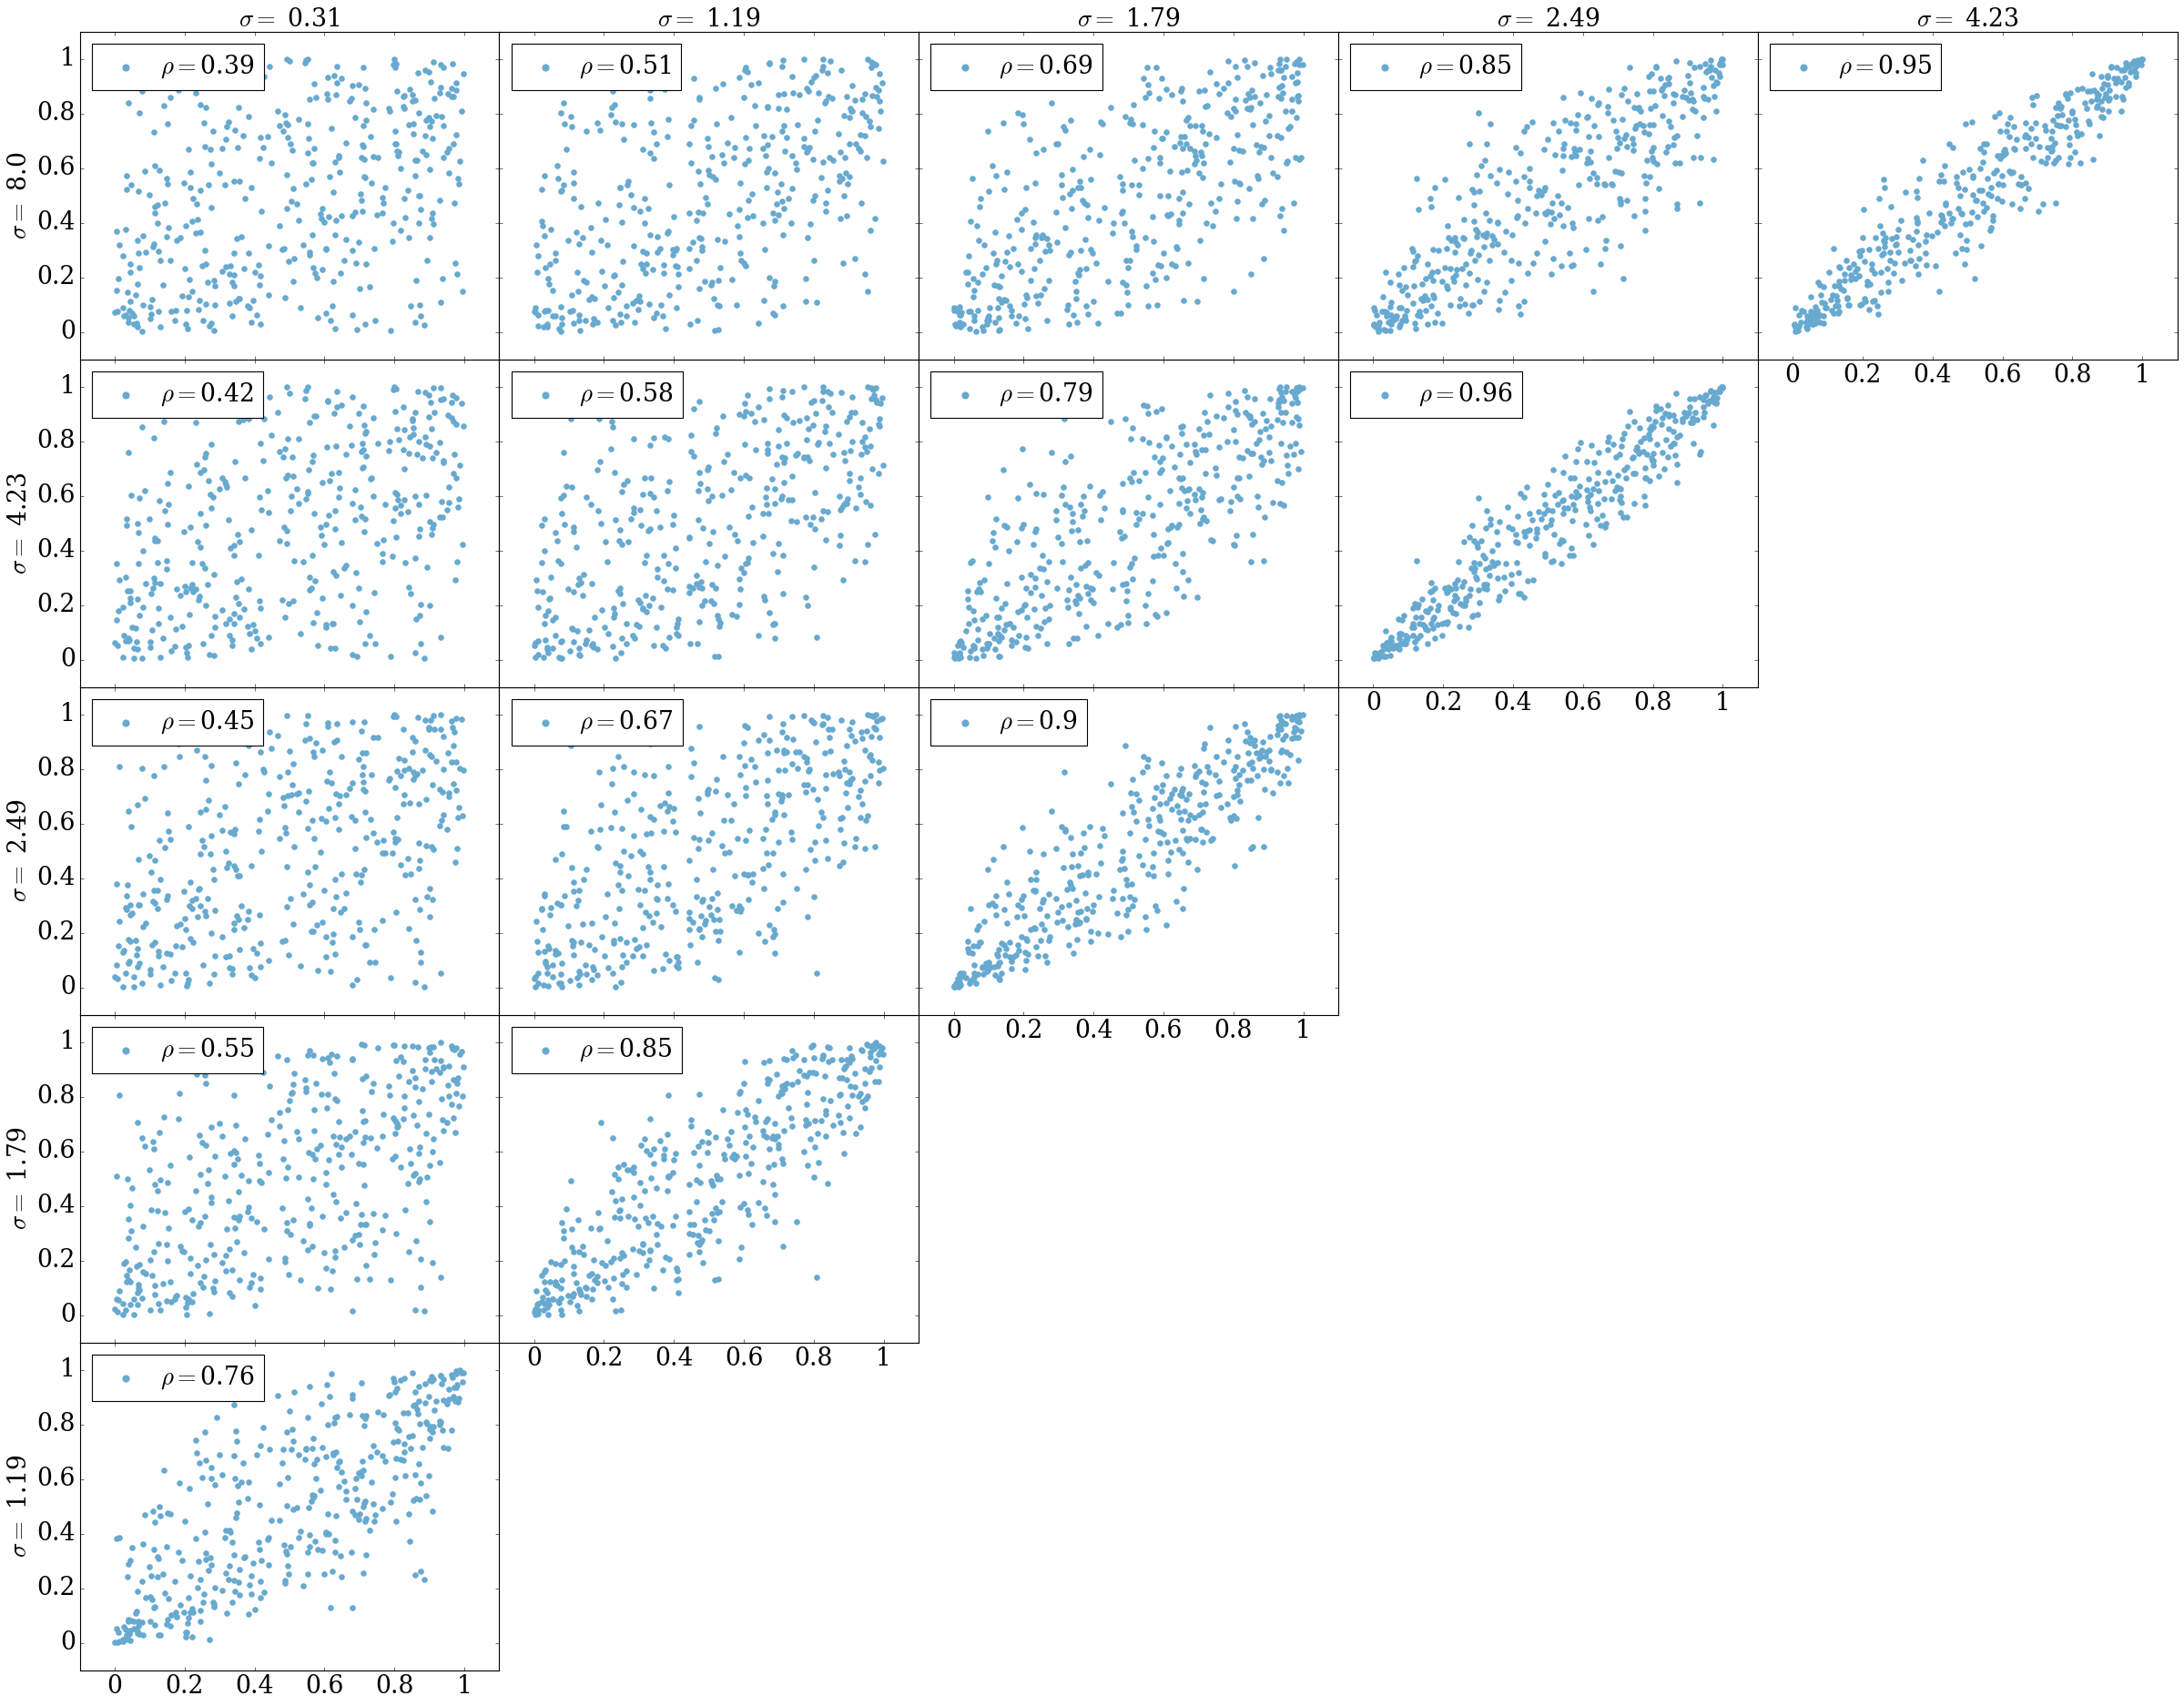

avg pair-wise correlation:  0.6872701592930284
./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/


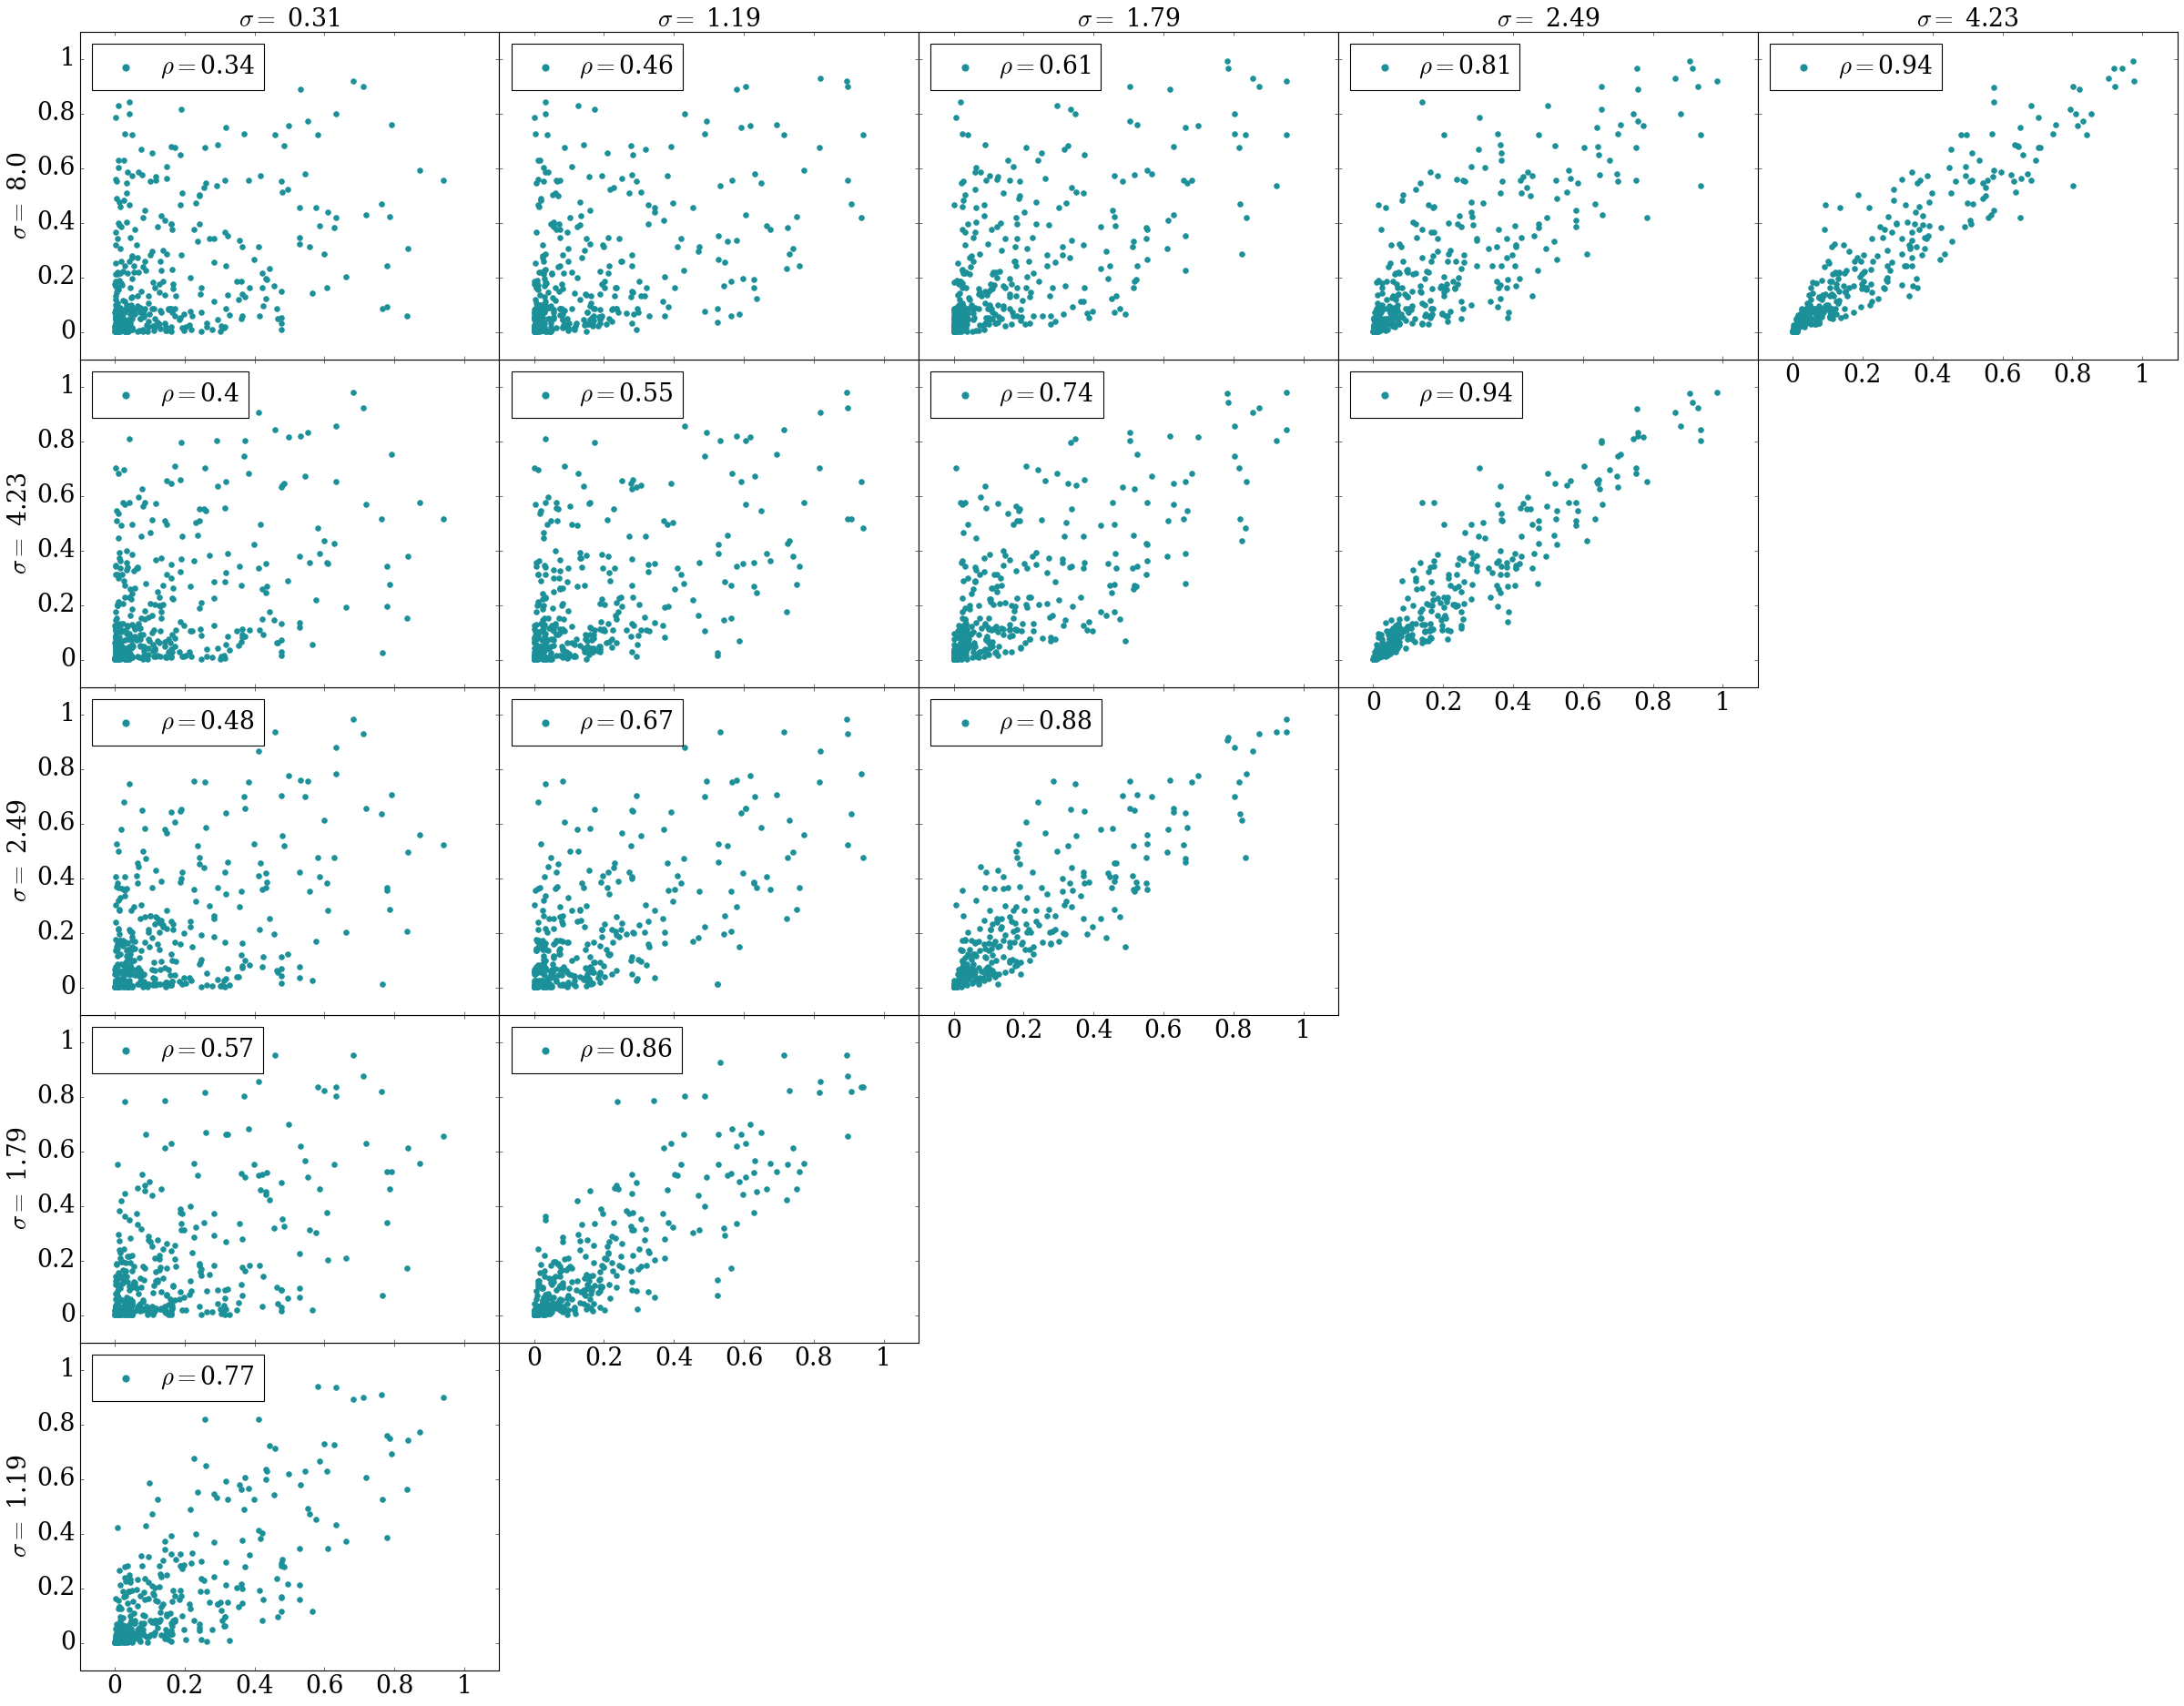

avg pair-wise correlation:  0.6780083065216087
./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/


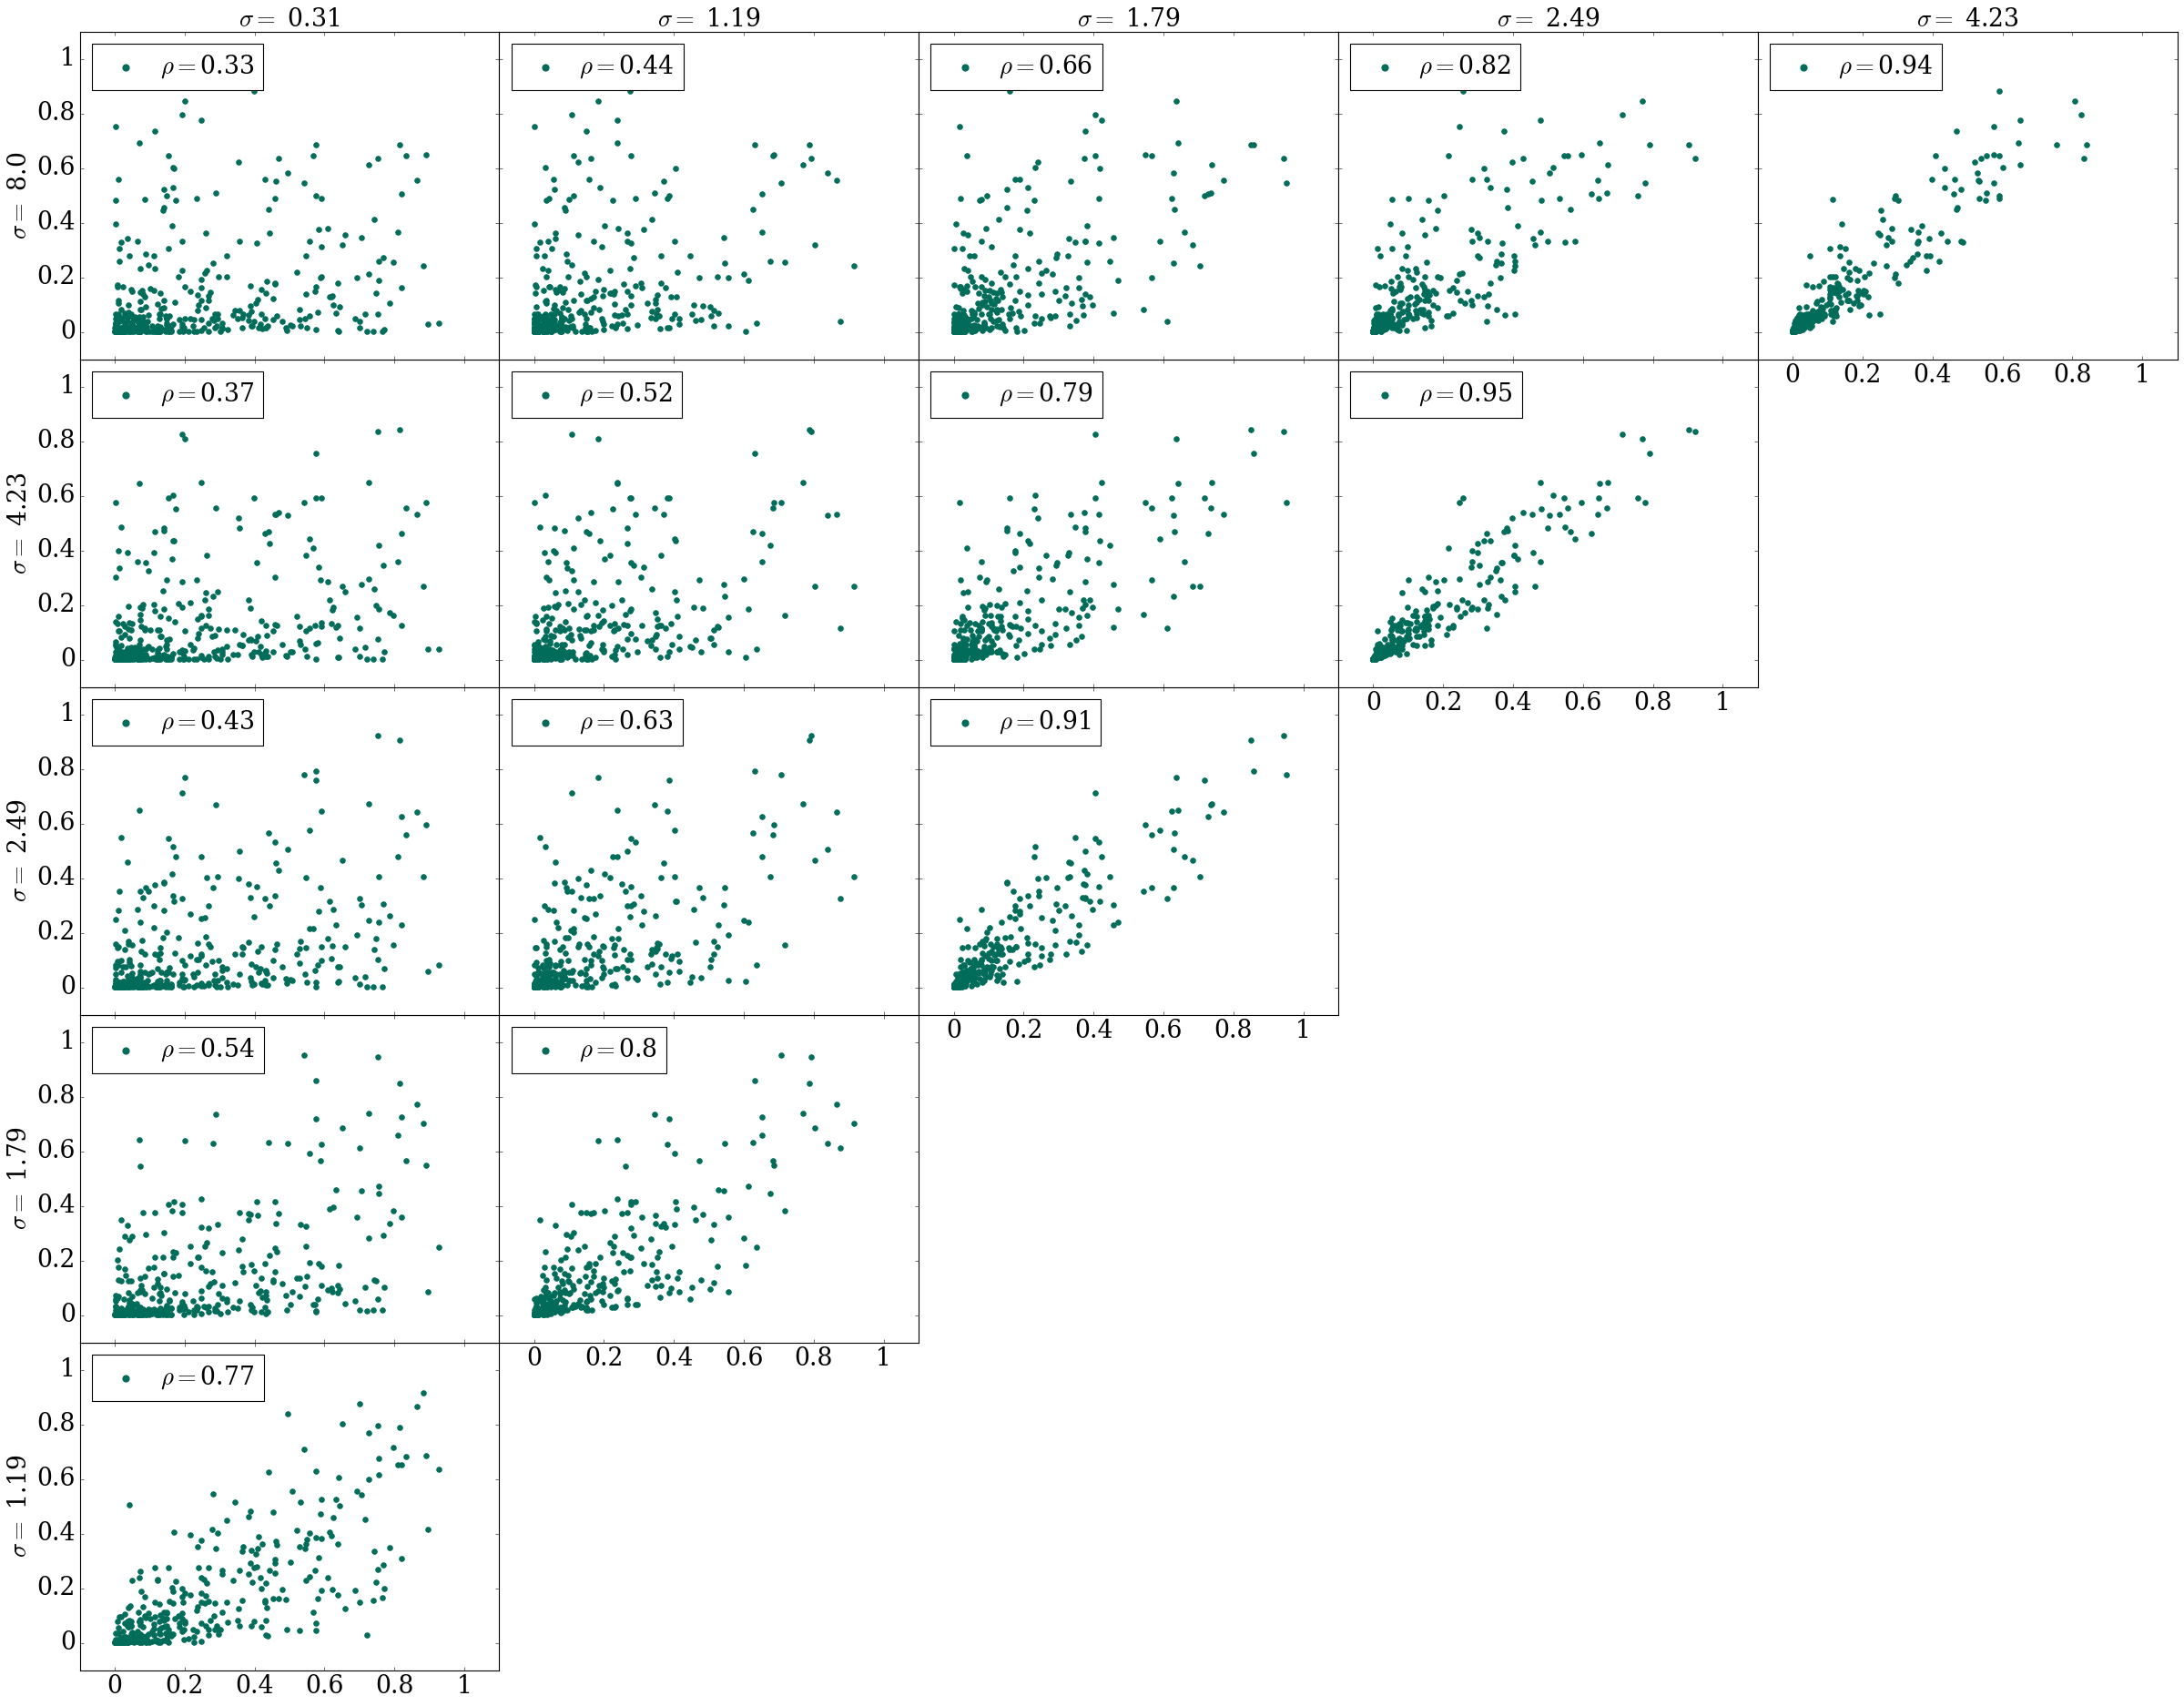

avg pair-wise correlation:  0.6723040818392066
./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/


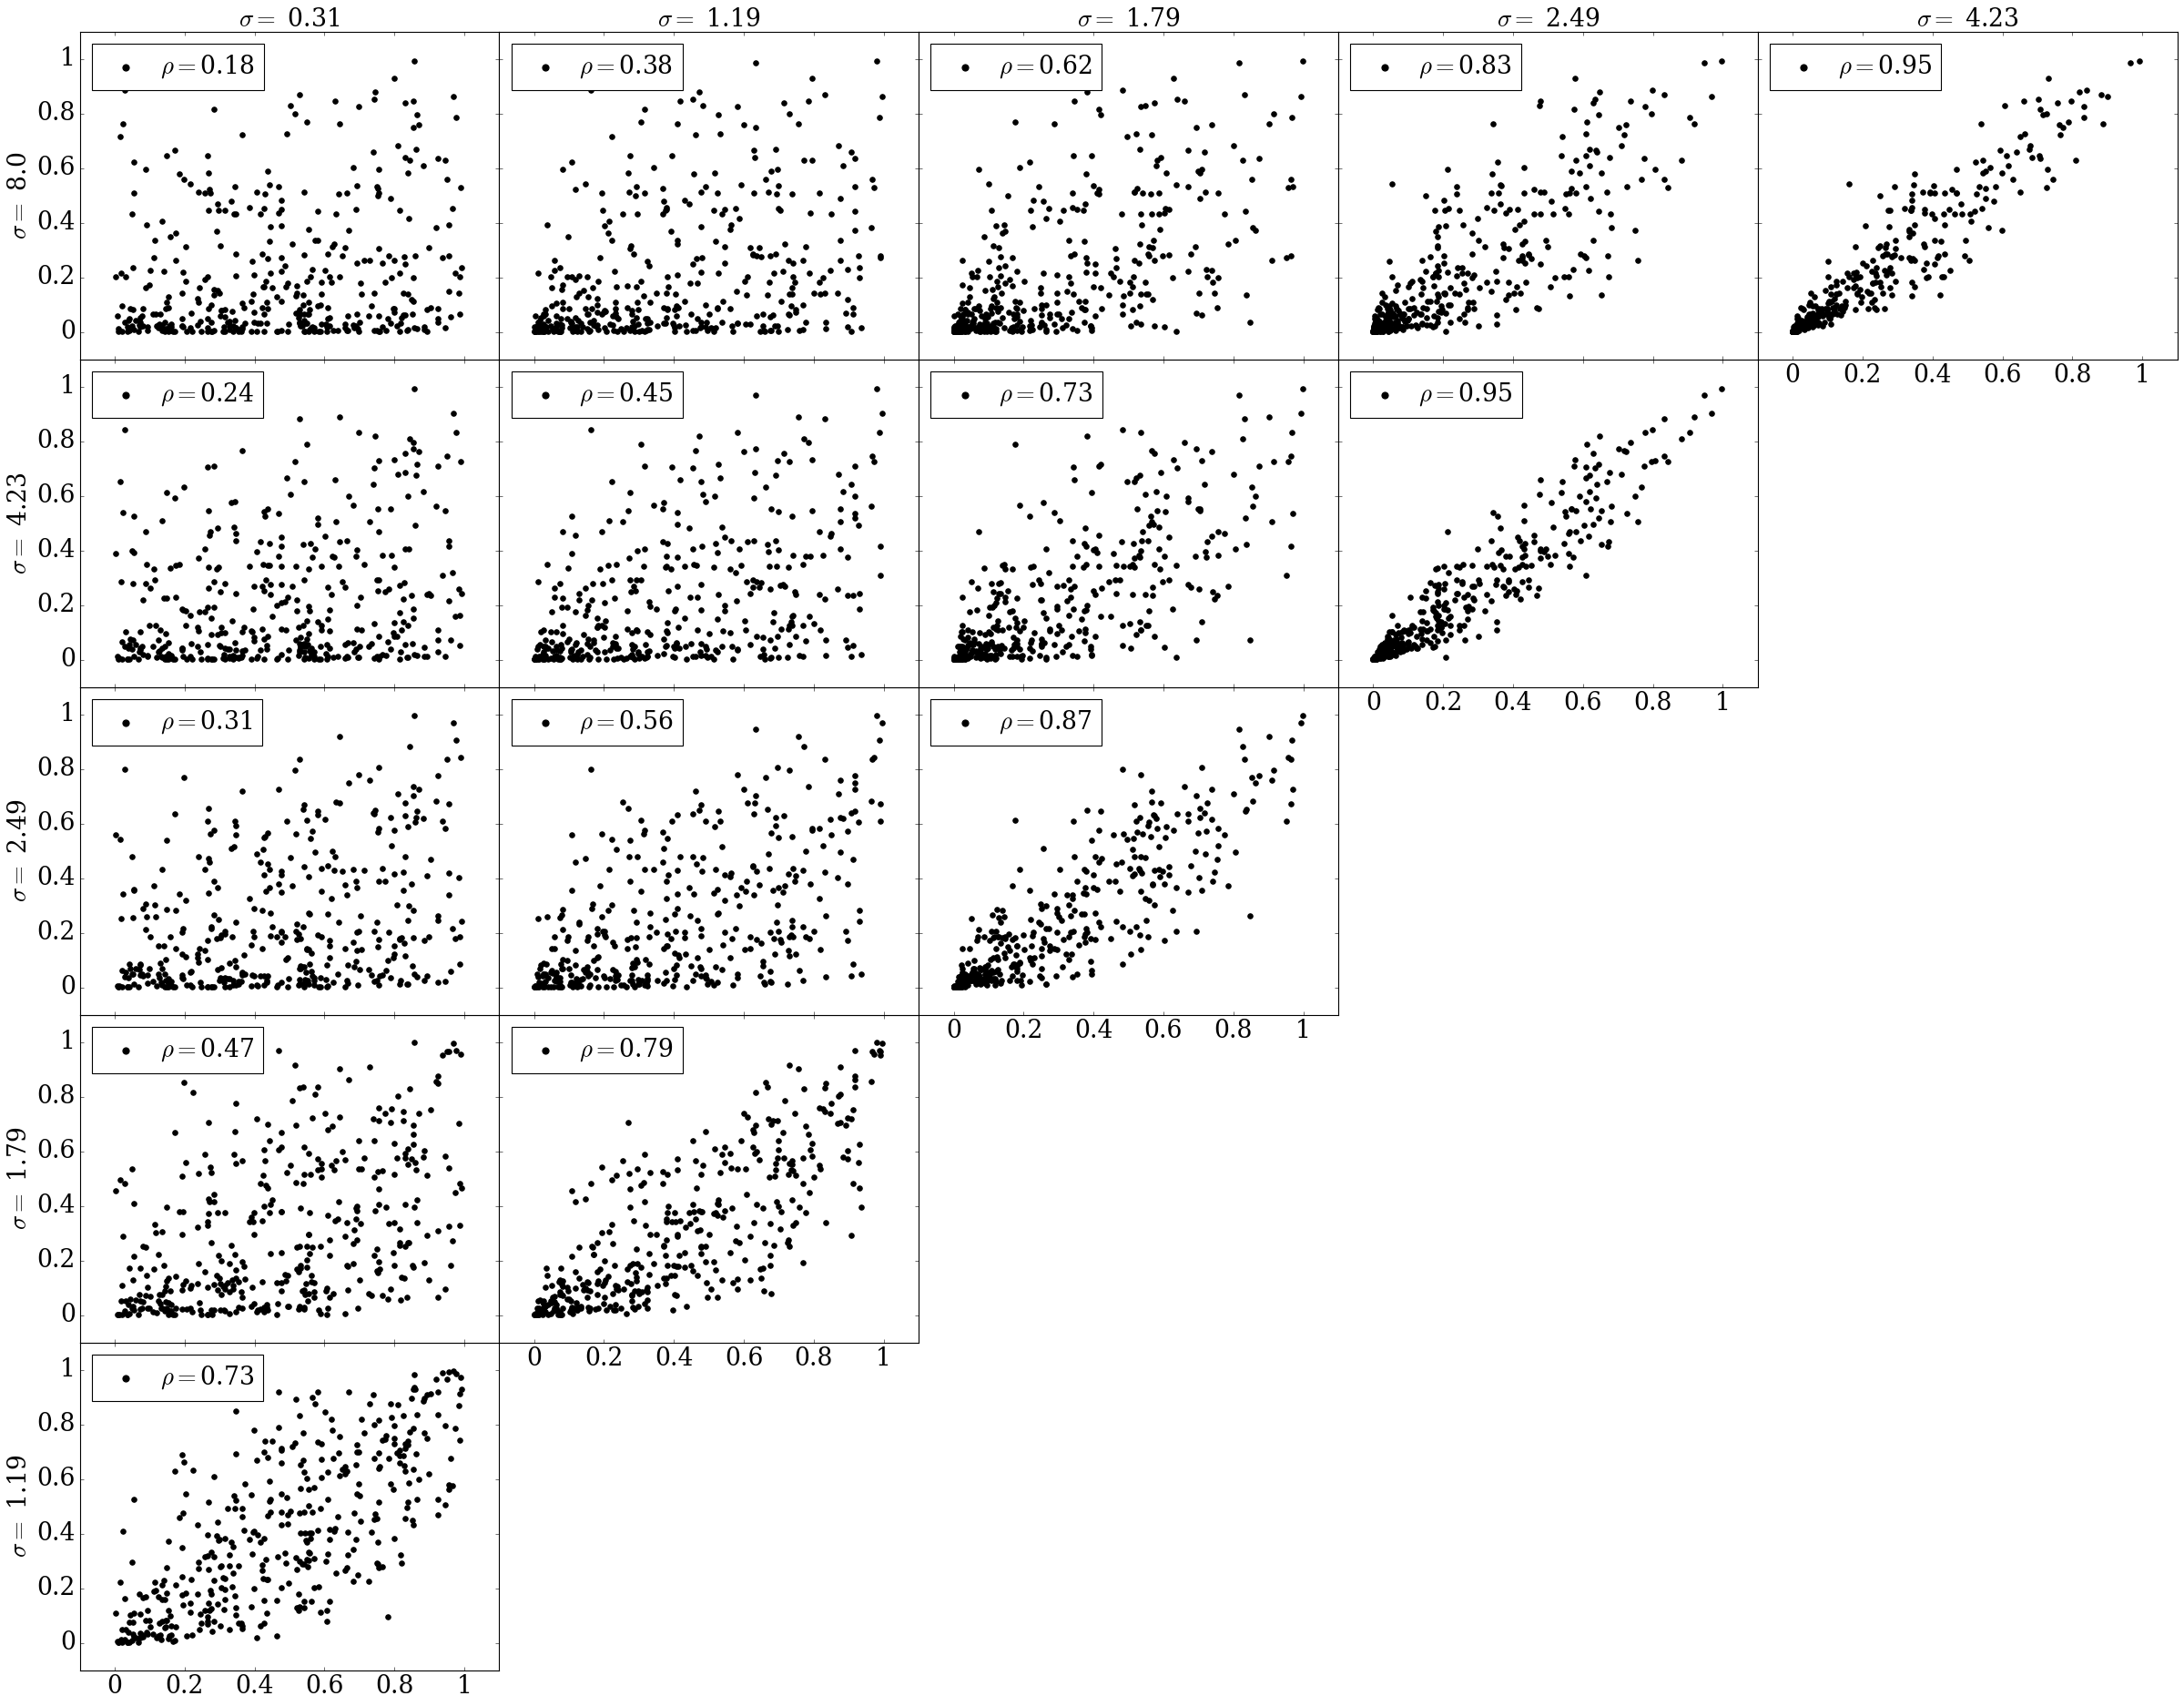

avg pair-wise correlation:  0.6552781908256743
./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/


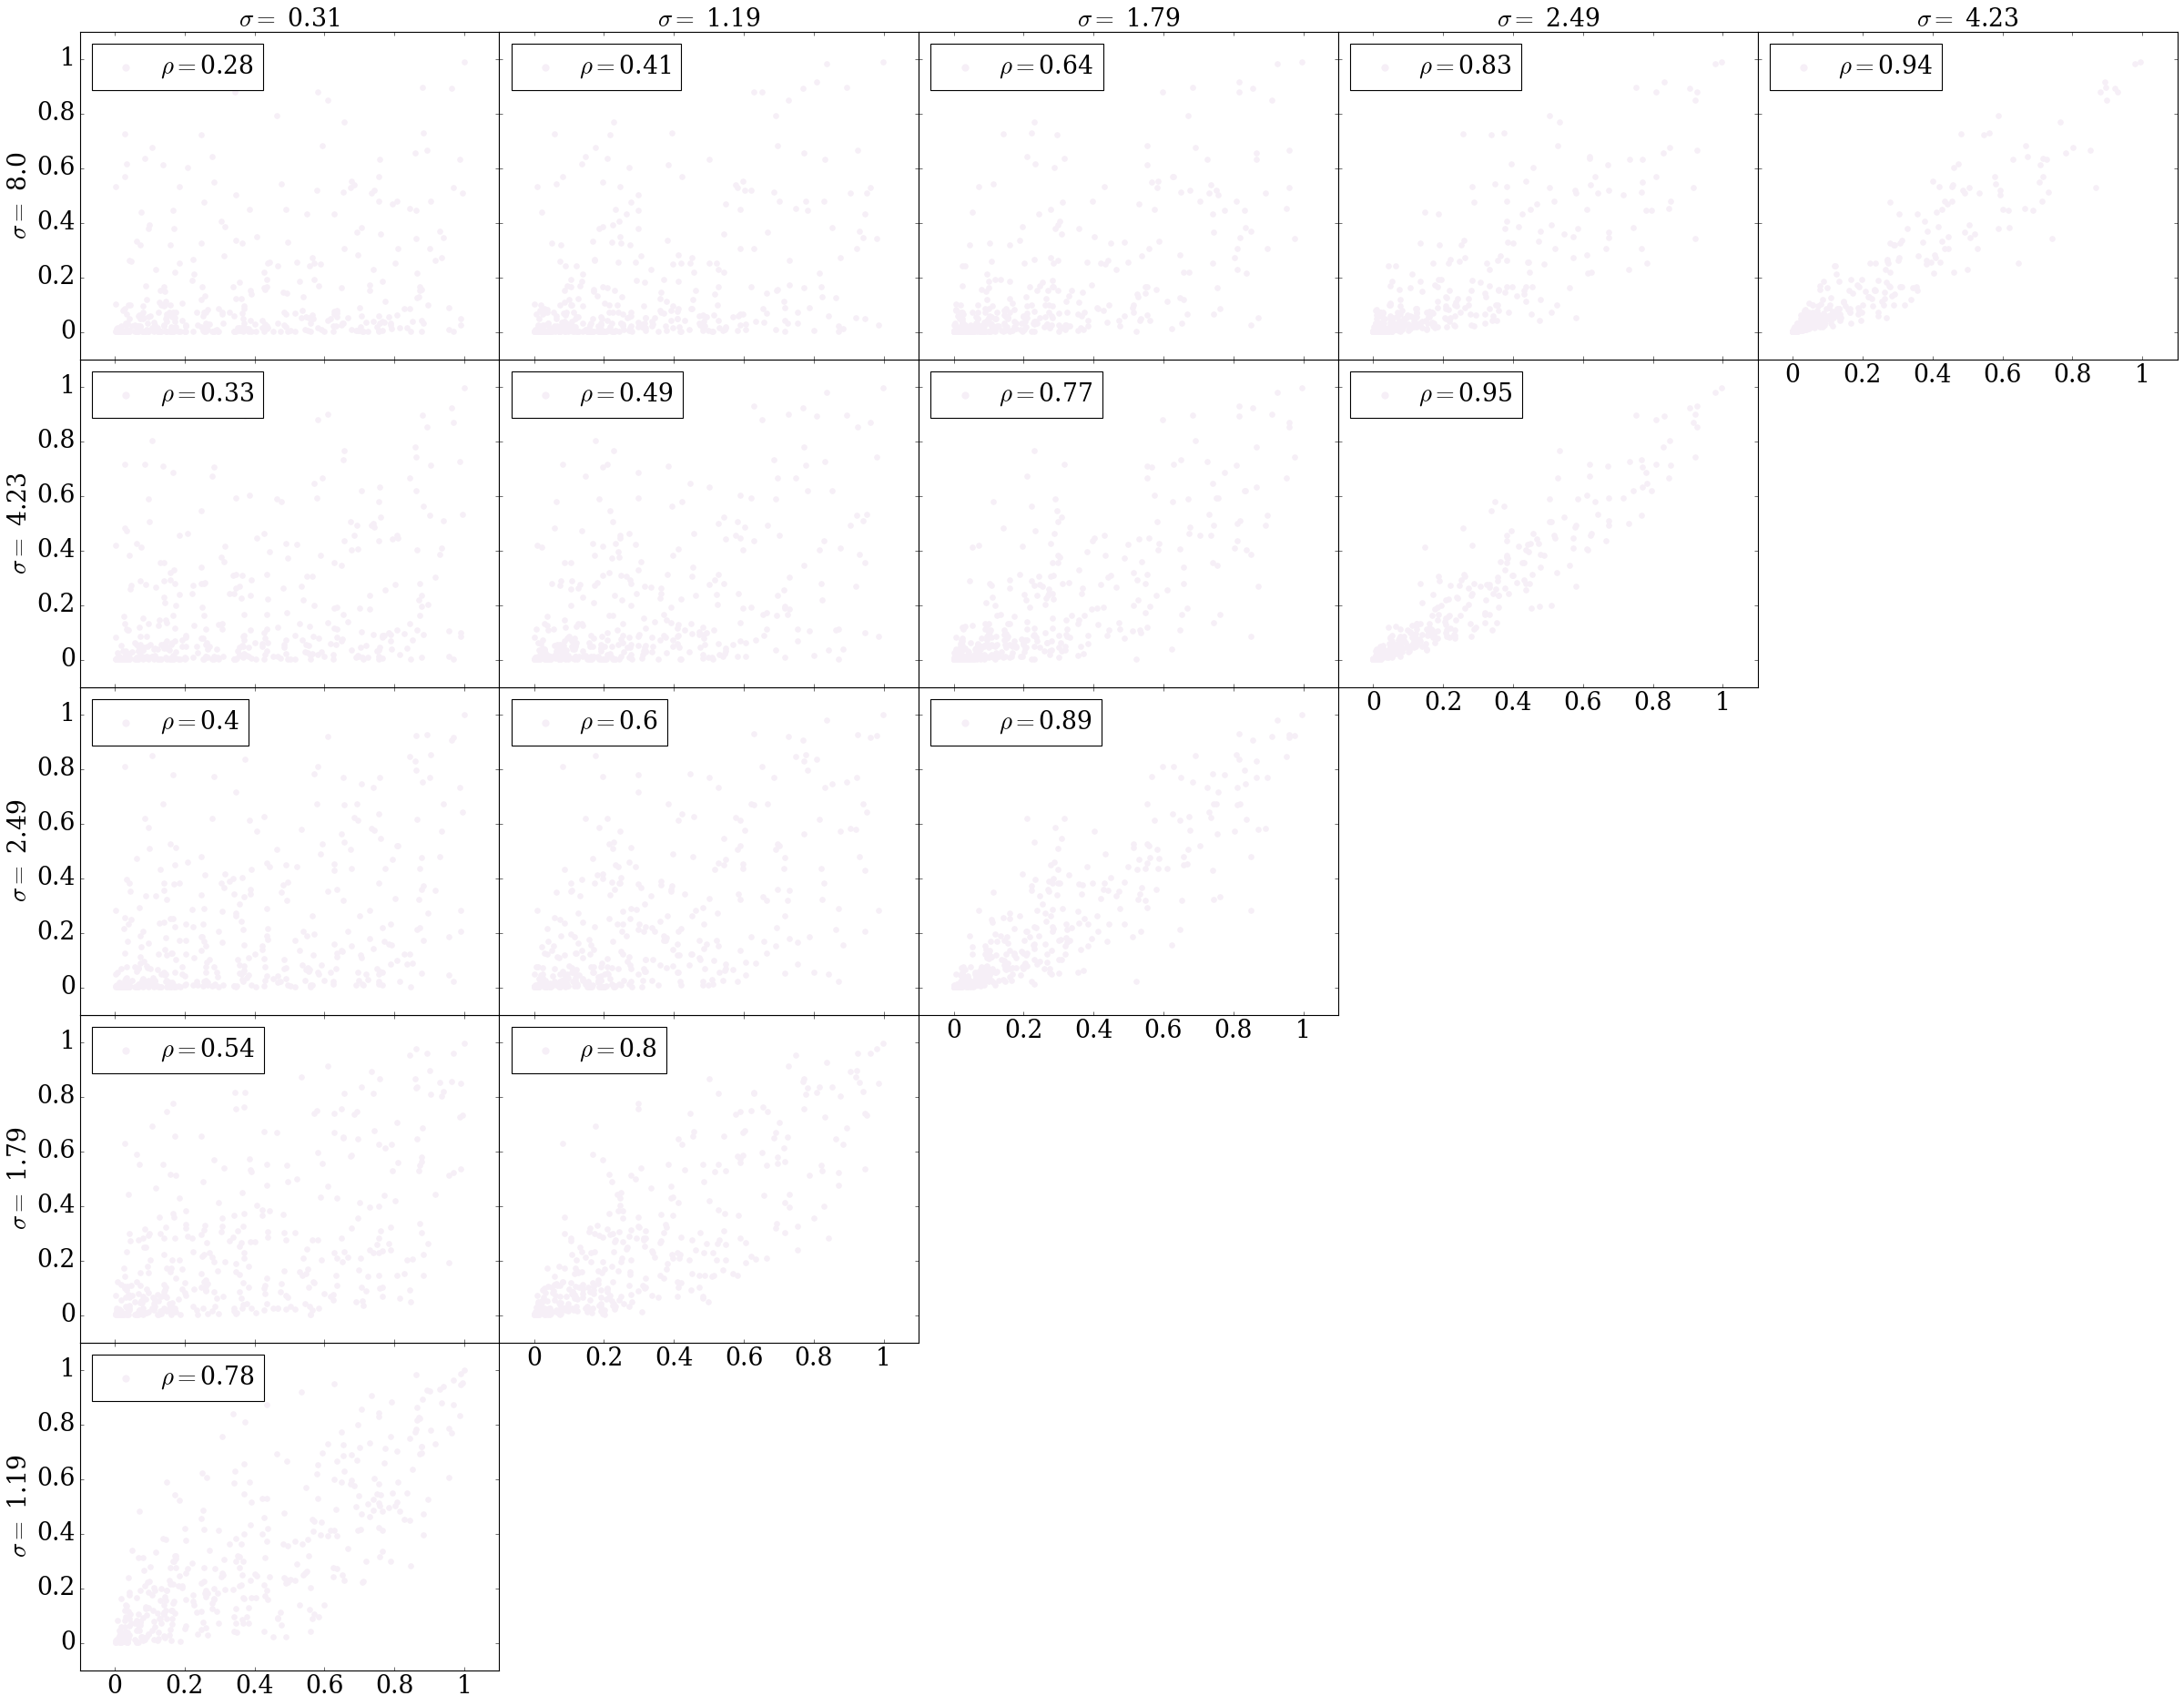

avg pair-wise correlation:  0.6530964736094672


In [126]:
tests = [0,3,4,5,8,9]
flk_sigmas = [0.31, 1.19, 1.79, 2.49, 4.23, 8.0 ]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]

labels = [NP.replace('_', ' ').replace('NS', 'N(S)=').replace('std', r'$\sigma=$ ').replace('loc', r'$\bar x =$ ') for NP in np_list]

color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
k=0
corr_list = []
for data_folder in data_folders:
    print(data_folder)
    fig  = plt.figure(figsize=(32, 25))
    fig.patch.set_facecolor('white')
    ref = np.load(ref_folder+"/t_array.npy")[:,tests]
    data = np.load(data_folder+"/t_array.npy")[:,tests]
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.18, 0.07+(j-1)*0.18, 0.18, 0.18])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(ref[:,i].reshape((-1,1)),data[:,i].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(ref[:,j].reshape((-1,1)),data[:,j].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:400,0], p_data_j[:400,0])[0][1]
                corr_list.append(corr)
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker='o', 
                            label=r'$\rho=$%s'%(str(np.around(corr, 2)))#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_5D_%i.pdf'%(k))
    k+=1
    plt.show()
    print('avg pair-wise correlation: ', np.sum(corr_list)/len(corr_list))

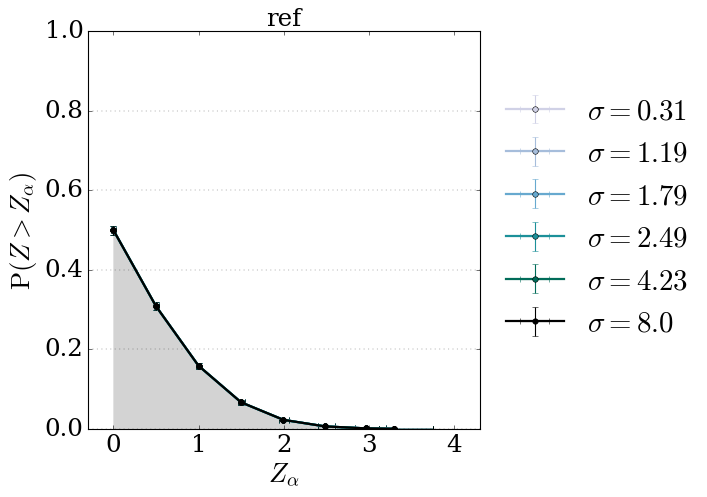

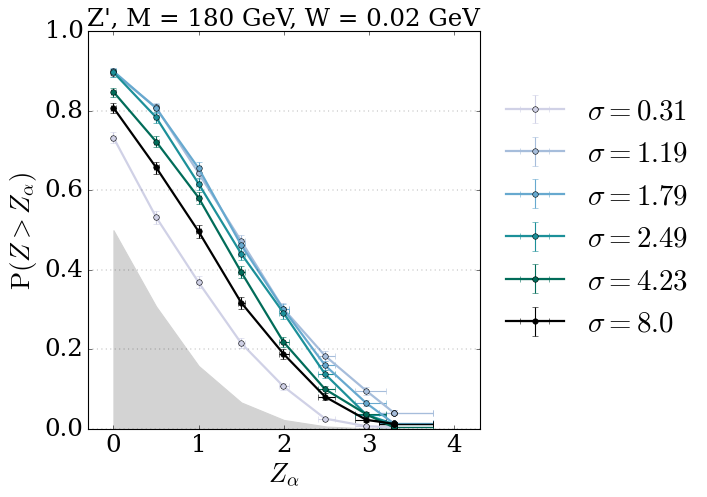

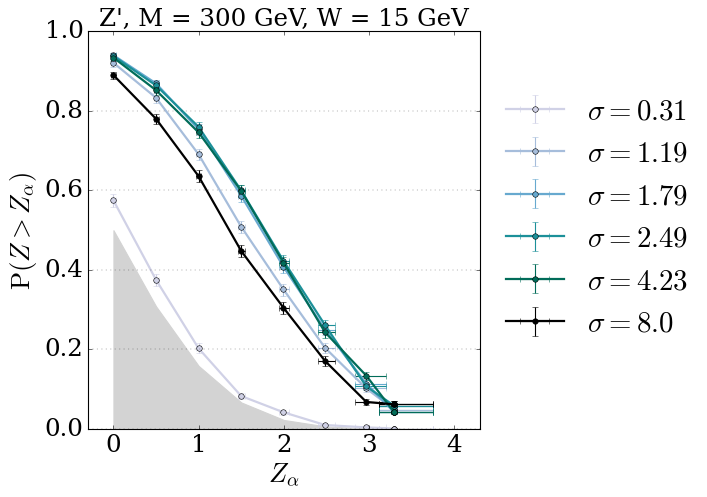

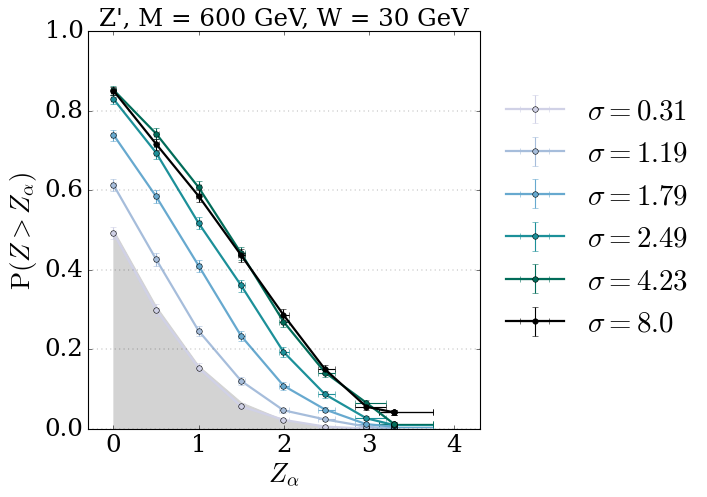

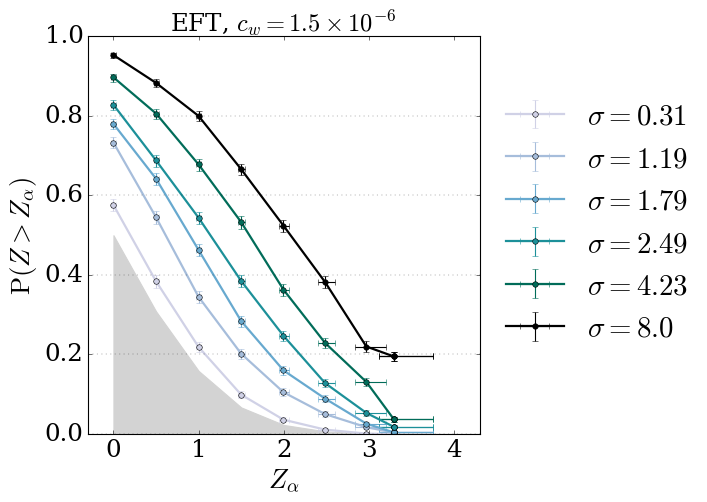

In [9]:
np_list = ['ref', 'Z180', 'Z300', 'Z600', 'EFT5']
colors = ['#d0d1e6','#a6bddb','#67a9cf','#1c9099','#016c59', 'black']    
font = font_manager.FontProperties(family='serif', size=26) 
flk_sigmas = [0.31, 1.19, 1.79, 2.49, 4.23, 8.0 ]
xlabels_tests= [ r'$\sigma=%s$'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
labels_plot = {
    'ref':'ref',
    'Z180': "Z', M = 180 GeV, W = 0.02 GeV",
    'Z300': "Z', M = 300 GeV, W = 15 GeV",
    'Z600': "Z', M = 600 GeV, W = 30 GeV",
    'EFT5': r"EFT, $c_w=1.5\times 10^{-6}$ ",
}

data_folders_dict = {
    "ref": "./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/",
    'Z180': "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/",
    'Z300': "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/",
    'Z600': "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/",
    'EFT5': "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/"
}

Z_alpha_ini = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 5]#[0,0.2, 0.5, 1, 1.2, 1.5, 1.7, 2, 2.5, 3.5, 4.5]
Z_alpha_ini = np.array(Z_alpha_ini)

lw=2
ms=5
ls='-'
zorder=2
plot_legend = True
for NP in np_list:
    fig  = plt.figure(figsize=(7*(1+0.4*(plot_legend==1)),7))
    fig.patch.set_facecolor('white')
    ax1 = fig.add_axes([0.2*1/(1+0.4*(plot_legend==1)), 0.15+0.01*(plot_legend==1), 0.7/(1+0.4*(plot_legend==1)), 0.7+0.01*(plot_legend==1)])
    
    ref = np.load(ref_folder+"/t_array.npy")[:,[0,3,4,5,8,9]]
    data = np.load(data_folders_dict[NP]+"/t_array.npy")[:,[0,3,4,5,8,9]]
    
    for i in range(ref.shape[1]):
        t0  = ref[:, i]
        t = data[:, i]
        mask0 = (~np.isnan(t0))*(~np.isinf(t0))
        mask  = (~np.isnan(t))*(~np.isinf(t))
        t0, t = t0[mask0], t[mask]
        eff_ref = power(t0,t0,zalpha=Z_alpha_ini)[2]
        eff_data = power(t0,t,zalpha=Z_alpha_ini)[2]
        alpha, alpha_edw, alpha_eup = np.array([p[0] for p in eff_ref]), np.array([p[1] for p in eff_ref]), np.array([p[2] for p in eff_ref])
        power_val, power_edw, power_eup = np.array([p[0] for p in eff_data]), np.array([p[1] for p in eff_data]), np.array([p[2] for p in eff_data])
        Z_alpha   = np.array([p_to_z(alpha[i]) for i in range(len(alpha))])
        Z_alpha_eup = np.array([p_to_z(alpha[i]-alpha_edw[i])-p_to_z(alpha[i]) for i in range(len(alpha))])
        Z_alpha_edw = np.array([p_to_z(alpha[i])-p_to_z(alpha[i]+alpha_eup[i]) for i in range(len(alpha))]) 
    
        x = Z_alpha[~np.isinf(Z_alpha)]
        y = power_val[~np.isinf(Z_alpha)]
        y_dw, y_up = power_edw[~np.isinf(Z_alpha)], power_eup[~np.isinf(Z_alpha)]
        x_dw, x_up = Z_alpha_edw[~np.isinf(Z_alpha)], Z_alpha_eup[~np.isinf(Z_alpha)]
        ax1.errorbar(x, y, 
                     yerr=[y_dw, y_up], 
                     xerr=[x_dw, x_up], 
                     marker='o', label=xlabels_tests[i], color=colors[i],#r'NPLM M=8530, $\lambda=1^{-4}$', color='#1c9099', 
                     lw=lw, ms=ms, ls=ls, elinewidth=1, zorder=zorder)
    
    
        i+=1
    ##########
    ax1.fill_between(Z_alpha_ini[~np.isinf(Z_alpha_ini)], 
                    y1=np.zeros_like(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                    y2=1-norm.cdf(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                     color='lightgrey',
                    )
    #########
    plt.yticks(fontsize=22, fontname='serif')
    plt.xticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4], fontsize=22, fontname='serif')
    plt.ylim(0,1)
    plt.xlim(-0.3,4.3)
    ax1.tick_params(axis='y')
    ax1.tick_params(axis='x')
    ax1.set_ylabel(r'${\rm P}(Z>Z_{\alpha})$', fontsize=24, fontname='serif')
    ax1.set_xlabel(r'$Z_{\alpha}$',      fontsize=24, fontname='serif')
    plt.grid(axis='y', lw=0.25, ls=':')
    ax1.set_title(labels_plot[NP], fontsize=22, fontname='serif')
    if plot_legend:
        ax1.legend(prop=font, loc='upper left', bbox_to_anchor=(1., 0.9),
               frameon=False, ncol=1, numpoints=1)
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(1) 
    if plot_legend:
        fig.savefig('./power_5D_%s.pdf'%(NP))
    else:
        fig.savefig('./power_5D_noleg_%s.pdf'%(NP))
    plt.show()
    plt.close()

# 6D

In [29]:
flk_sigmas_all = [1.2, 1.7, 2.5, 3.2, 3.9, 4.6, 5.1, 6.1, 12.2]
files = [
    './exp_gaia/6D/w1-5-25-50-75-90-95-99-out/t_6D-M853_lam1e-06_Niter100000000_NB121339_NS0.h5',
    './exp_gaia/6D/w1-5-25-50-75-90-95-99-out/t_6D-M853_lam1e-06_Niter100000000_NB121339_NS333.h5',
    ]

np_list = ['ref', 'S=333']
tstat_dict = {}
i=0
for f5 in files:
    tmp = []
    f = h5py.File(f5, 'r')
    if not len(flk_sigmas_all):
        flk_sigmas_all = list(f.keys())
        print(flk_sigmas_all)
    for flk_sigma in flk_sigmas_all:
        key = str(flk_sigma) 
        tmp.append(np.array(f[key]))
    f.close()
    print('Number of toys: ', tmp[0].shape)
    tstat_dict[np_list[i]] = np.stack(tmp, axis=1)
    i+=1

Number of toys:  (2000,)
Number of toys:  (2000,)


In [30]:
tests = [0, 2, 3, 4, 7, 8]
for NP in np_list:
    print(NP)
    ref = tstat_dict['ref'][:,tests]
    data = tstat_dict[NP][:,tests]
    ref_90 = tstat_dict['ref'][:,[5]]
    data_90 = tstat_dict[NP][:,[5]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
1 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
2 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
3 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
4 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
5 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-min	 [(0.0245, 0.00344, 0.00341), (0.0025, 0.00108, 0.00107)]
p-prod	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-avg	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
t-smax	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-90	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
+++++++++++++++++++
S=333
0 [(0.2785, 0.0101, 0.00982), (0.076, 0.00592, 0.00585)]
1 [(0.28, 0.01012, 0.00984), (0.103, 0.0068, 0.0067)]
2 [(0.286, 0.01019, 0.0099), (0.0875, 0.00632, 0.00623)]
3 [(0.2755, 0.01007, 0.00979), (0.0475, 0.00475, 0.0047)]
4 [(0.219, 0.0093, 0.00908), (0.0455, 0.00465, 0.0046)]
5 [(0.1745, 0.00852, 0.

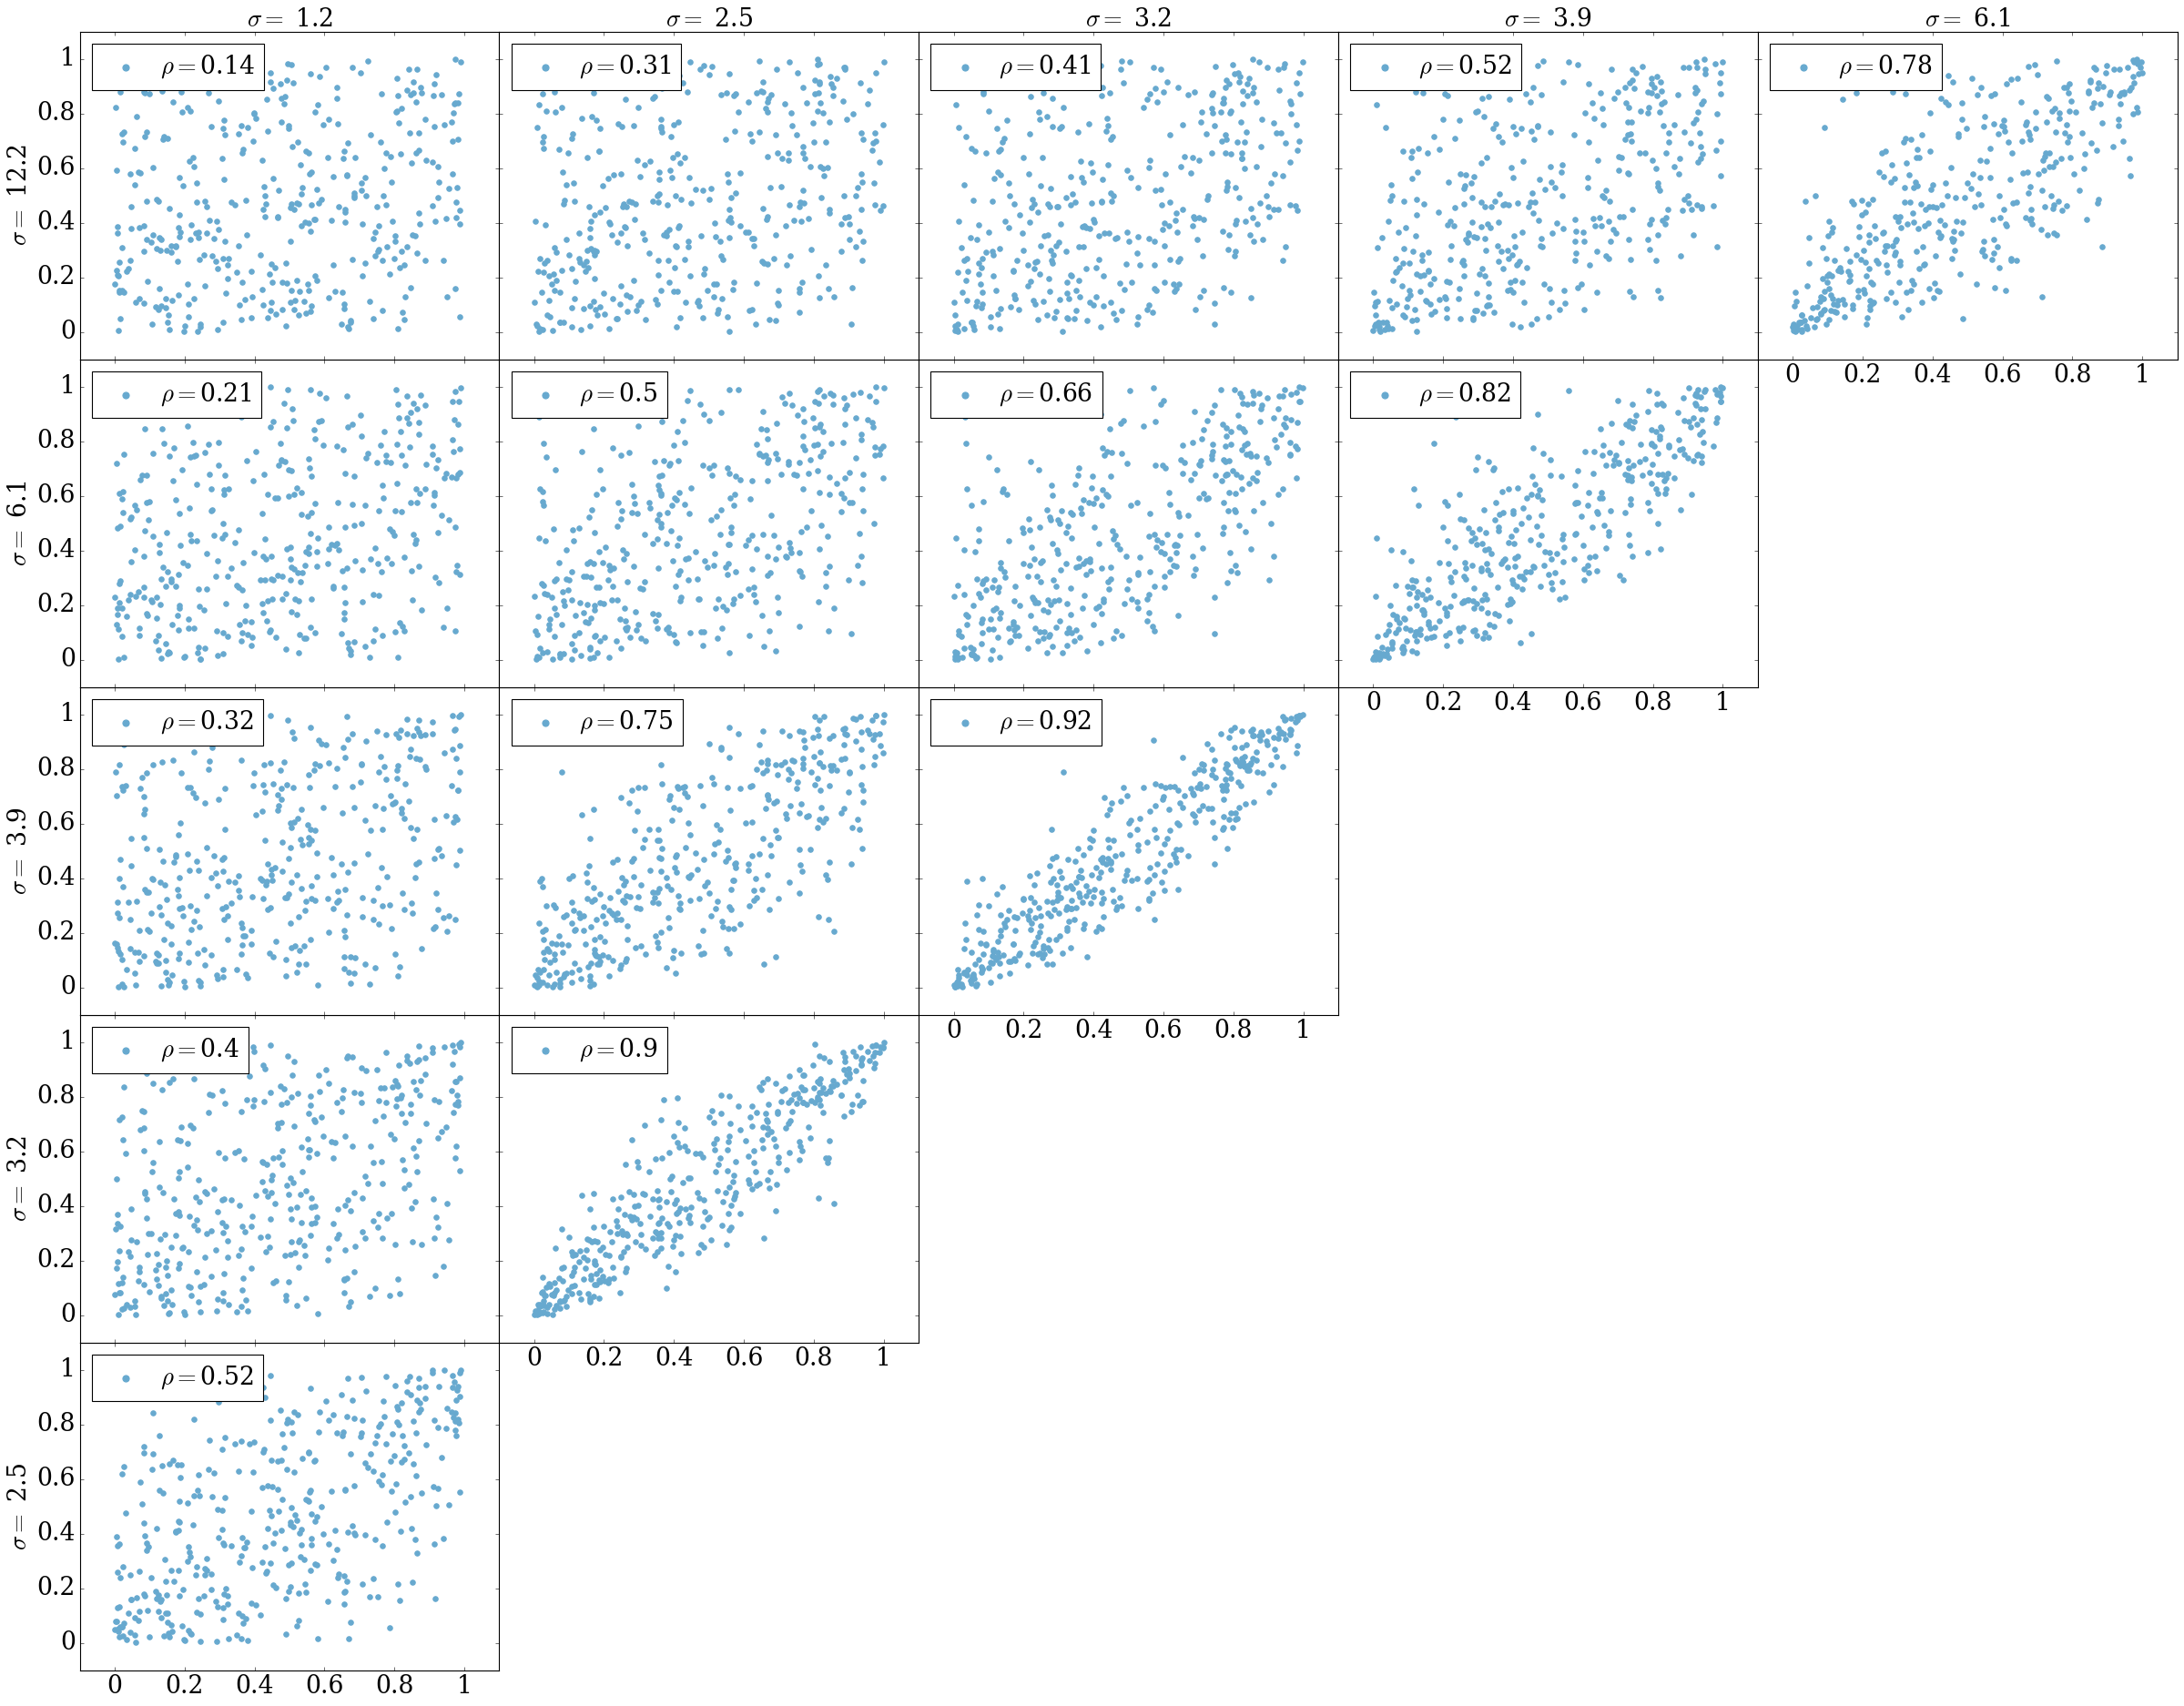

avg pair-wise correlation:  0.5430575161737906


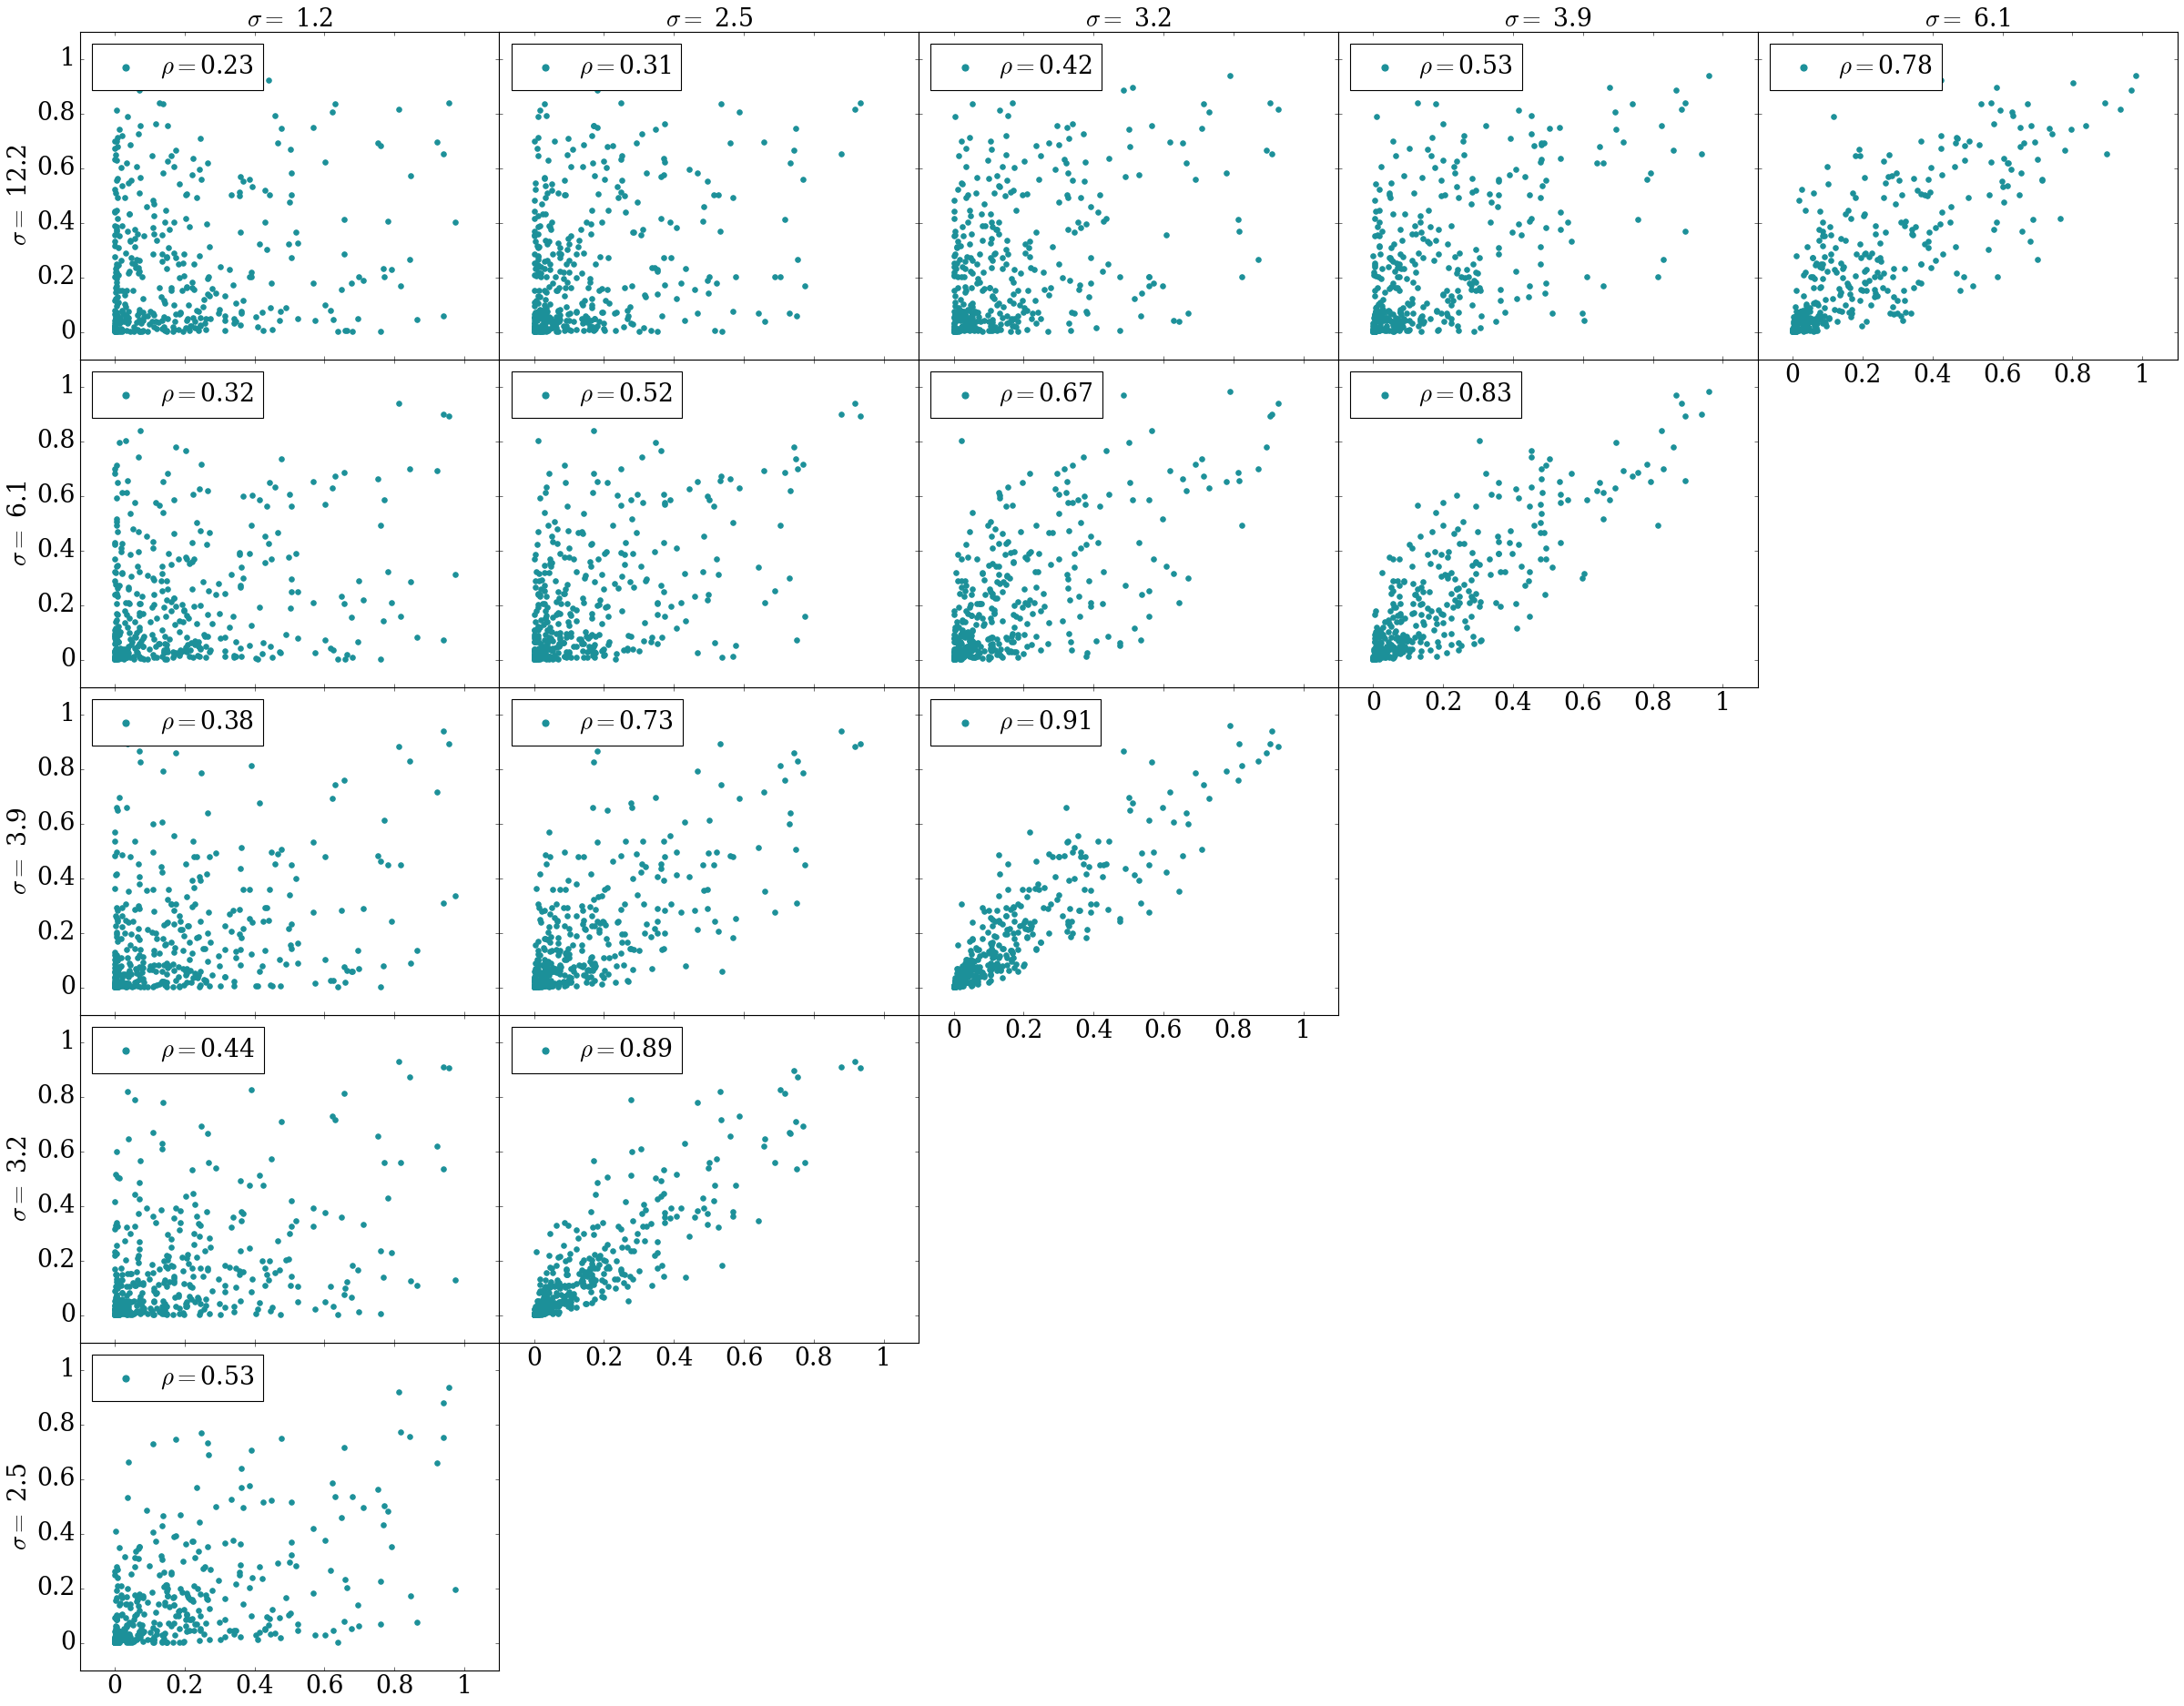

avg pair-wise correlation:  0.5552301358530376


In [31]:
tests = [0, 2, 3, 4, 7, 8]
flk_sigmas = [flk_sigmas_all[i] for i in tests]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
corr_list =[]
for k in range(len(np_list)):
    fig  = plt.figure(figsize=(32, 25))
    fig.patch.set_facecolor('white')
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.18, 0.07+(j-1)*0.18, 0.18, 0.18])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(tstat_dict['ref'][:,tests[i]].reshape((-1,1)),tstat_dict[np_list[k]][:,tests[i]].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(tstat_dict['ref'][:,tests[j]].reshape((-1,1)),tstat_dict[np_list[k]][:,tests[j]].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:, 0], p_data_j[:, 0])[0][1]
                corr_list.append(corr)
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker='o', 
                            label=r'$\rho=$%s'%(str(np.around(corr, 2)))#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_6D_%i.pdf'%(k))
    plt.show()
    print('avg pair-wise correlation: ', np.sum(corr_list)/len(corr_list))

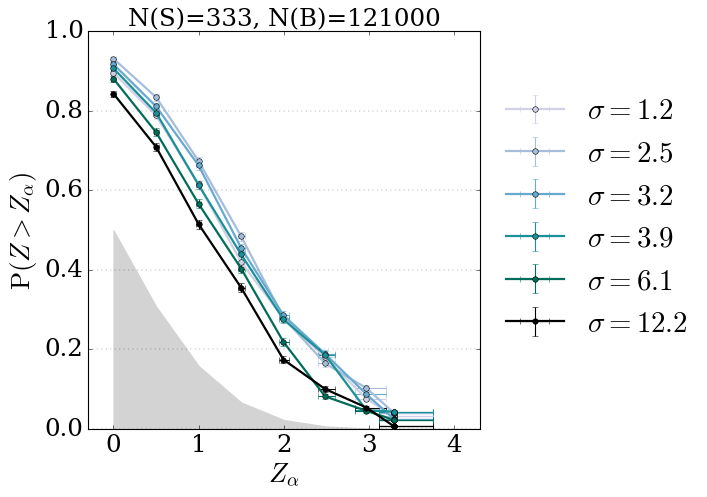

In [16]:
colors = ['#d0d1e6','#a6bddb','#67a9cf','#1c9099','#016c59', 'black']    
font = font_manager.FontProperties(family='serif', size=26) 
xlabels_tests= [
          r'$\sigma=1.2$',
          r'$\sigma=2.5$',
          r'$\sigma=3.2$',
          r'$\sigma=3.9$',
          r'$\sigma=6.1$',
          r'$\sigma=12.2$',
         ]

Z_alpha_ini = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 5]#[0,0.2, 0.5, 1, 1.2, 1.5, 1.7, 2, 2.5, 3.5, 4.5]
Z_alpha_ini = np.array(Z_alpha_ini)

lw=2
ms=5
ls='-'
zorder=2
plot_legend=True
fig  = plt.figure(figsize=(7*(1+0.4*(plot_legend==1)),7))
fig.patch.set_facecolor('white')
ax1 = fig.add_axes([0.2*1/(1+0.4*(plot_legend==1)), 0.15+0.01*(plot_legend==1), 0.7/(1+0.4*(plot_legend==1)), 0.7+0.01*(plot_legend==1)])

ref = tstat_dict['ref'][:,[0,2,3,4,7,8]]
data = tstat_dict[NP][:,[0,2,3,4,7,8]]

for i in range(ref.shape[1]):
    t0  = ref[:, i]
    t = data[:, i]
    mask0 = (~np.isnan(t0))*(~np.isinf(t0))
    mask  = (~np.isnan(t))*(~np.isinf(t))
    t0, t = t0[mask0], t[mask]
    eff_ref = power(t0,t0,zalpha=Z_alpha_ini)[2]#efficiency_root(t0, thr)
    eff_data = power(t0,t,zalpha=Z_alpha_ini)[2]#efficiency_root(t, thr)
    alpha, alpha_edw, alpha_eup = np.array([p[0] for p in eff_ref]), np.array([p[1] for p in eff_ref]), np.array([p[2] for p in eff_ref])
    power_val, power_edw, power_eup = np.array([p[0] for p in eff_data]), np.array([p[1] for p in eff_data]), np.array([p[2] for p in eff_data])
    Z_alpha   = np.array([p_to_z(alpha[i]) for i in range(len(alpha))])
    Z_alpha_eup = np.array([p_to_z(alpha[i]-alpha_edw[i])-p_to_z(alpha[i]) for i in range(len(alpha))])
    Z_alpha_edw = np.array([p_to_z(alpha[i])-p_to_z(alpha[i]+alpha_eup[i]) for i in range(len(alpha))]) 

    x = Z_alpha[~np.isinf(Z_alpha)]
    y = power_val[~np.isinf(Z_alpha)]
    y_dw, y_up = power_edw[~np.isinf(Z_alpha)], power_eup[~np.isinf(Z_alpha)]
    x_dw, x_up = Z_alpha_edw[~np.isinf(Z_alpha)], Z_alpha_eup[~np.isinf(Z_alpha)]
    ax1.errorbar(x, y, 
                 yerr=[y_dw, y_up], 
                 xerr=[x_dw, x_up], 
                 marker='o', label=xlabels_tests[i], color=colors[i],#r'NPLM M=8530, $\lambda=1^{-4}$', color='#1c9099', 
                 lw=lw, ms=ms, ls=ls, elinewidth=1, zorder=zorder)


    i+=1
ax1.fill_between(Z_alpha_ini[~np.isinf(Z_alpha_ini)], 
                y1=np.zeros_like(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                y2=1-norm.cdf(Z_alpha_ini[~np.isinf(Z_alpha_ini)]), 
                 color='lightgrey',
                )
#########
plt.yticks(fontsize=22, fontname='serif')
plt.xticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4], fontsize=22, fontname='serif')
plt.ylim(0,1)
plt.xlim(-0.3,4.3)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x')
ax1.set_ylabel(r'${\rm P}(Z>Z_{\alpha})$', fontsize=24, fontname='serif')
ax1.set_xlabel(r'$Z_{\alpha}$',      fontsize=24, fontname='serif')
plt.grid(axis='y', lw=0.25, ls=':')
ax1.set_title('N(S)=333, N(B)=121000', fontsize=22, fontname='serif')
ax1.legend(prop=font, loc='upper left', bbox_to_anchor=(1., 0.9),
           frameon=False, ncol=1, numpoints=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1) 
fig.savefig('./power_6D_%s.pdf'%(NP))
plt.show()
plt.close()